# Analisi sul data set Amazon E-commerce Products & Reviews

Il [dataset Amazon E-commers Products & Reviews](https://www.kaggle.com/datasets/lazylad99/amazon-e-commerce-product-and-review-dataset?select=reviews.csv) su Kaggle, contiene metadati dettagliati dei prodotti Amazon, recensioni dei clienti e punteggi di sentimenti. Questo insieme di dati è particolarmente indicato per analizzare il mercato e i comportamenti d'acquisto.

SCOPO FINALE DELL'ANALISI DATI
- Brand più recensiti e con sentimento positivo (per cui brand dove conviene investire)
- Brand più recensiti e con sentimento negativo (per cui brand dove NON conviene investire)

- Categorie prodotti più venduti e totale degli incassi in base alla categoria
- Categorie prodotti più recensiti e con sentimento positivo (per cui categorie su cui investire)
- Categorie prodotti più recensiti e con sentimento negativo (per cui categorie su cui NON investire)
- Prodotti più recensiti e con sentimento positivi
- Prodotti più recensiti e con sentimento negativo

In [1]:
# import libraries

# data analisys
import pandas as pd
import numpy as np
import math

# plotting/data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateFormatter
print(pd.__version__, np.__version__, sns.__version__)

2.3.3 2.3.5 0.13.2


## Comprensione dei Dati (EDA)

### Loading dataset

In [2]:
# load dataset
dfamazon = pd.read_csv('products_with_reviews_clean.csv')

# show first 10 rows of the dataset
display(dfamazon.head(10))

# show last 10 rows of the dataset
display(dfamazon.tail(10))

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score
0,146,SLIM FIT. Designed with a functional fit in mi...,B0006U6C0Q,In Stock,"#1,493 in Clothing, Shoes & Jewelry (See Top 1...",Wrangler Store,"Clothing, Shoes & Jewelry › Men › Clothing › J...",Customers appreciate the jeans for their quali...,size:34W x 29L,color:Prewashed Indigo,...,R103VSGVPRSZ6F,230.0,Color: Prewashed IndigoSize: 32W x 34L,5.0,"Reviewed in the United States on September 18,...",2.0,For the 936PWD Style!,True,husband wrangler man probably last year used h...,0.1340
1,54,DESIGNS: Right sleeve with a pocket of the pol...,B09TK9248H,In Stock,"#49,564 in Clothing, Shoes & Jewelry (See Top ...",ZITY Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers appreciate the nice colors and comfo...,size:X-Large,color:Gnblg,...,R103YA89AQKKT4,0.0,Size: X-LargeColor: GnblkHeight: 6'3Weight: 21...,5.0,"Reviewed in the United States on December 16, ...",4.0,You should buy these,True,low expectation cheap going give son turn husb...,0.3563
2,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,In Stock,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers find that the compression shirts fit...,size:Medium,NaN,...,R105XJ6QWC0GUL,0.0,Size: SmallColor: White (100)/Black,5.0,"Reviewed in the United States on January 18, 2025",8.0,Keep a you cool while working out,True,got wear hockey equipment keep cool dry run li...,0.1292
3,56,"100% Polyester, Quick Dry & Lightweight，Camo p...",B0C1SC8PR9,In Stock,"#44,945 in Clothing, Shoes & Jewelry (See Top ...",MoFiz Store,"Clothing, Shoes & Jewelry › Men › Clothing › S...","Customers appreciate the comfortable fit, nice...",size:Large,color:B-army Green Camo,...,R1084B47TWDC0Z,0.0,Size: X-LargeColor: B-army Green CamoHeight: 5...,5.0,"Reviewed in the United States on December 26, ...",4.0,Very comfortable and breathable,True,liked true size good price lightweight comfort...,0.5100
4,43,High Performance Material: Polo shirts for men...,B0D38YFY3K,In Stock,"#32,242 in Clothing, Shoes & Jewelry (See Top ...",ZENGVEE Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...","Customers appreciate the shirts' fit, look, an...",size:Large,color:1black Gray Green Navy White,...,R10A6DXDSXNG8V,0.0,Size: X-LargeColor: 1black Gray Green Blue Khaki,4.0,"Reviewed in the United States on November 11, ...",8.0,Good but a skosh on the small side,True,comfortable well made tad bit toward small sid...,0.2833
5,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,In Stock,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers find that the compression shirts fit...,size:Medium,NaN,...,R10ATSAVN4XYOC,5.0,Size: LargeColor: Black (001)/WhiteHeight: 6'1...,4.0,"Reviewed in the United States on September 5, ...",4.0,Read before Purchasing,True,im gon na lie feeling bought shirt look buff a...,0.3357
6,153,"Slim fit,simple style,basic jeans you need eve...",B01N58LDY4,In Stock,"#13,904 in Clothing, Shoes & Jewelry (See Top ...",FREDD MARSHALL Store,"Clothing, Shoes & Jewelry › Men › Clothing › J...",Customers find the pants comfortable and stret...,size:32W x 32L,color:Black,...,R10GNORP27X12F,0.0,NaN,5.0,"Reviewed in the United States on January 18, 2025",3.0,"Stylish jeans, great quality and fit for the m...",True,order fredd marshall blue denim jean v going l...,0.1893
7,76,America's #1 Men's Underwear Brand - Source: C...,B086L1PM8V,In Stock,"#580 in Clothing, Shoes & Jewelry (See Top 100...",Hanes Store,"Clothing, Shoes & Jewelry › Men › Clothing › S...",Customers appreciate the shirts for their soft...,size:Medium,color:Assorted 

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score
6345,910,"Versatile Design: Three sleep gowns, featuring...",B0744PN2MV,In Stock,NaN,Simple Joys by Carter's Store,"Clothing, Shoes & Jewelry › Baby › Baby Girls ...","Customers appreciate the softness, cozy design...",size:0-3 Months,color:Grey/White,...,RXRJ80VKII5OW,5.0,Size: 0-3 MonthsColor: Grey/White,5.0,"Reviewed in the United States on September 18,...",1.0,The Perfect Blend of Comfort and Convenience,True,simple joy carter baby pack neutral cotton sle...,0.3073
6346,903,100% Organic Cotton: All Burt's Bees Baby Paja...,B08Q3H4W7T,In Stock,NaN,Burt's Bees Baby Store,"Clothing, Shoes & Jewelry › Baby › Baby Boys ›...","Customers appreciate the softness, comfort, an...",size:3T,color:Happy Herbivores,...,RXZ8I5PXSG41U,0.0,Size: 3TColor: Watercolor ChevronNumber of Ite...,5.0,"Reviewed in the United States on February 7, 2025",9.0,"Good quality, cotton pajamas",True,nice pajama set cotton good quality would cons...,0.3900
6347,912,ComfortableTwo piece outfit set includes hoodi...,B08FDXYMR5,Only 1 left in stock - order soon.,NaN,Rebey Store,"Clothing, Shoes & Jewelry › Baby › Baby Boys ›...",Customers find the coordinated outfit has a cu...,size:9-12 Months,color:Grey,...,RY3FN036ESPPR,0.0,NaN,5.0,"Reviewed in the United States on April 26, 2023",8.0,So cute!,True,right coming home outfit new grand nephew well...,0.3019
6348,938,"Includes 5 onesies, Weave Type: KnitCotton rib...",B07QPQLW34,In Stock,NaN,Brand: Gerber,"Clothing, Shoes & Jewelry › Baby › Baby Boys ›...",Customers find the leotards have a cute design...,size:0-3 Months,color:Hello Bear,...,RY7256WOZWMNK,0.0,NaN,5.0,"Reviewed in the United States on February 17, ...",4.0,So precious,True,excellent gift new baby boy grandmother loved ...,0.6673
6349,904,Boys Lightweight Jogger Pants:Waistband has a ...,B0C8NGNT8L,In Stock,NaN,Brand: WaltZon,"Clothing, Shoes & Jewelry › Boys › Clothing › ...","Customers appreciate the pants for their soft,...",size:13-14,color:Wz3801black,...,RYCDI8EKDNLI3,0.0,Size: 11-12Color: Wz3801blackHeight: 4'11Weigh...,3.0,"Reviewed in the United States on April 30, 2024",8.0,Very thin,True,theyre nice material thin ankle little tight w...,-0.0707
6350,991,STYLE - Classic high rise taper jean sits at n...,B00021NY28,In Stock,NaN,Gloria Vanderbilt Store,"Clothing, Shoes & Jewelry › Women › Clothing ›...","Customers appreciate the pants' style, comfort...",size:14 Short,NaN,...,RYED2SJ8764AF,22.0,Size: 4Color: Frisco,5.0,"Reviewed in the United States on February 11, ...",2.0,Beautiful Jeans,True,imo gloria vanderbilt amanda jean best woman j...,0.5286
6351,952,【STRETCHY FABRIC】 Men's ribbed polo shirt made...,B0DMSVLHJ1,In Stock,NaN,COOFANDY Store,"Clothing, Shoes & Jewelry › Men › Clothing › S...",NaN,size:Small,color:Dark Red,...,RZHEW1JUICN7G,0.0,Color: Light GreenSize: Medium,5.0,"Reviewed in the United States on February 14, ...",2.0,Awesome shirt - can be dressed up or down,True,husband really like shirt accentuates muscle e...,-0.2800
6352,988,SKINNY FIT: Experience a snug fit with these s...,B07J31WFNB,In Stock,NaN,Amazon Essentials Store,"Clothing, Shoes & Jewelry › Women › Clothing ›...",Customers appreciate the pants for their comfo...,size:10,color:Light Olive,...,RZSTEM6M58WPD,7.0,Size: 8Color: Light OliveHeight: 5'2Weight: 14...,5.0,"Reviewed in the United States on January 16, 2025",7.0,Best pants ever!,True,put pant came straight write review im super i...,0.3355
6353,943,【Material】 :This men's button down short sleev...,B0DYSWTXH4,In stock,NaN,PORCLAY Store,"Clothing, Shoes & Jewelry › Men › Clothing › S...",NaN,size:Small,color:White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6354,987,Material: 100% cottonLength: 4 MtrsIdeal for r...,B0

### Shape e la struttura base

In [3]:
# show the number of rows and columns in the dataset
display('Numero di righe e colonne', dfamazon.shape)

# show the column names in the dataset
display('Nomi delle colonne', dfamazon.columns)

# show the number of non-null values in each column
display(dfamazon.value_counts())



'Numero di righe e colonne'

(6355, 35)

'Nomi delle colonne'

Index(['s_no', 'about_item', 'asin', 'availability', 'best_sellers_rank',
       'brand_name', 'breadcrumbs', 'customer_review_summary',
       'default_variant0', 'default_variant1', 'default_variant2',
       'manufacturer', 'model_number', 'price_value', 'product_description',
       'rating_count', 'rating_distribution1star', 'rating_distribution2star',
       'rating_distribution3star', 'rating_distribution4star',
       'rating_distribution5star', 'rating_stars', 'recent_purchases',
       'seller_name', 'title', 'review_id', 'helpful_vote_count',
       'product_variant', 'rating', 'review_metadata', 'review_position',
       'review_title', 'verified_purchase', 'cleaned_review_text',
       'sentiment_score'],
      dtype='object')

Series([], Name: count, dtype: int64)

Il dataframe in analisi ha 6355 righe e 35 colonne.

Le colonne del dataframe nel dettaglio:
- **s_no**: è un numero intero che contiene gli id di prodotti
- **about_item**: è un oggetto che contiene la descrizione breve del prodotto
- **asin**: è un oggetto che contiene il codice del prodotto
- **availability**: è un oggetto che contiene lo stato del prodotto
- **best_sellers_rank**: è un oggetto che contiene il rating migliore dei consumatori 
- **brand_name**: è un oggetto che contiene il nome del brand
- **breadcrumbs**: è un oggetto che contiene la ierarhia del prodotto ovvero dove si trova
- **customer_review_summary**: è un oggetto che contiene il sommario delle recensioni dei consumatori 
- **default_variant0**: è un oggetto che contiene la taglia/la misura del prodotto
- **default_variant1**: è un oggetto che contiene il colore del prodotto
- **default_variant2**: è un oggetto che contiene le altri descrizioni del prodotto, es. altro colore
- **manufacturer**: è un oggetto che contiene nome dell'azienda che produce il prodotto
- **model_number**: è un oggetto che contiene il numero del modello
- **price_value**: è un numero float che contiene il prezzo corrente
- **product_description**: è un oggetto che contiene la descrizione del prodotto
- **rating_count**: è un oggetto che contiene il numero delle recensioni 
- **rating_distribution1star**: è un oggetto che contiene distribuzione delle stelle(1)
- **rating_distribution2star**: è un oggetto che contiene distribuzione delle stelle(2)
- **rating_distribution3star**: è un oggetto che contiene distribuzione delle stelle(3)
- **rating_distribution4star**: è un oggetto che contiene distribuzione delle stelle(4)
- **rating_distribution5star**: è un oggetto che contiene distribuzione delle stelle(5)
- **rating_stars**: è un oggetto che contiene il rating del prodotto
- **recent_purchases**: è un oggetto che contiene aquisti recenti
- **seller_name**: è un oggetto che contiene il nome del venditore
- **title**: è un oggetto che contiene il titolo
- **review_id**: è un oggetto che contiene id della recensione
- **helpful_vote_count**: è un numero float che contiene numero delle votazioni utili
- **product_variant**: è un oggetto che contiene la variante del prodotto
- **rating**: è un numero float che contiene il rating del prodotto
- **review_metadata**: è un oggetto che contiene i metadati delle recensioni
- **review_position**: è un numero float che contiene la posizione della recensione, come appare sotto il prodotto
- **review_title**: è un oggetto che contiene il titolo della recensione
- **verified_purchase**: è un oggetto che contiene la verificazione dell'aquisto
- **cleaned_review_text**: è un oggetto che contiene il testo della recensione pulito
- **sentiment_score**: è un numero float che contiene il punteggio di sentiment che rappresenta l'orientamento emotivo da -1 a 1(negativo; neutro; positivo)

### Statistiche descrittive

Dall'analisi descrittiva posso dedurre che abbiamo 3 parametri a cui mancano la stessa quantità di dati pari a 28, nello specifico: helpful_vote_count, review_position e sentiment_score. Invece nella colonna rating la mancanza dei dati è leggermente più elevata, ovvero 35 valori mancanti.

L'analisi del prodotto in generale mostra che questo ha un prezzo medio di 33,70.

Infine le recensioni dei prodotti sono più che positive perchè il loro rating medio con range compreso tra 1-5 è 4.533228.

In [4]:
# show names of columns and the data types of each column in the dataset
display('Nomi delle colonne e tipi di dati', dfamazon.info())

# show summary statistics for numerical columns in the dataset
display('Statistiche riassuntive per colonne numeriche', dfamazon.describe())

# show summary statistics for all columns in the dataset
display('Statistiche riassuntive per tutte le colonne', dfamazon.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   s_no                      6355 non-null   int64  
 1   about_item                6355 non-null   object 
 2   asin                      6355 non-null   object 
 3   availability              6254 non-null   object 
 4   best_sellers_rank         5001 non-null   object 
 5   brand_name                6355 non-null   object 
 6   breadcrumbs               6288 non-null   object 
 7   customer_review_summary   5829 non-null   object 
 8   default_variant0          6187 non-null   object 
 9   default_variant1          5886 non-null   object 
 10  default_variant2          10 non-null     object 
 11  manufacturer              2369 non-null   object 
 12  model_number              1769 non-null   object 
 13  price_value               6355 non-null   float64
 14  product_

'Nomi delle colonne e tipi di dati'

None

'Statistiche riassuntive per colonne numeriche'

,s_no,price_value,helpful_vote_count,rating,review_position,sentiment_score
count,6355.000000,6355.000000,6327.000000,6320.000000,6327.000000,6327.000000
mean,411.259481,33.705065,3.336336,4.533228,5.374743,0.307546
std,290.009883,23.617557,19.090762,0.855710,2.889921,0.218020
min,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000
25%,175.000000,19.900000,0.000000,4.000000,3.000000,0.168600
50%,357.000000,28.410000,0.000000,5.000000,5.000000,0.300000
75%,542.500000,40.010000,2.000000,5.000000,8.000000,0.450000
max,1011.000000,249.990000,710.000000,5.000000,10.000000,1.000000


'Statistiche riassuntive per tutte le colonne'

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score
count,6355.000000,6355,6355,6254,5001,6355,6288,5829,6187,5886,...,6327,6327.000000,5836,6320.000000,6296,6327.000000,6313,6327,6288,6327.000000
unique,NaN,697,728,11,539,285,140,616,118,413,...,6327,NaN,4923,NaN,774,NaN,5162,2,6182,NaN
top,NaN,COMFORT FLEX WAISTBAND: Constructed with comfo...,B074KL8RVS,In Stock,"#470 in Clothing, Shoes & Jewelry (See Top 100...",Hanes Store,"Clothing, Shoes & Jewelry › Men › Clothing › J...",Customers find the shirts comfortable and soft...,size:Large,color:Black,...,R103VSGVPRSZ6F,NaN,Size: MediumColor: Black,NaN,"Reviewed in the United States on March 6, 2025",NaN,Comfortable,True,good,NaN
freq,NaN,33,19,5739,33,319,511,14,1528,969,...,1,NaN,31,NaN,154,NaN,64,6167,13,NaN
mean,411.259481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.336336,NaN,4.533228,NaN,5.374743,NaN,NaN,NaN,0.307546
std,290.009883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.090762,NaN,0.855710,NaN,2.889921,NaN,NaN,NaN,0.218020
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,-1.000000
25%,175.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,4.000000,NaN,3.000000,NaN,NaN,NaN,0.168600
50%,357.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,5.000000,NaN,5.000000,NaN,NaN,NaN,0.300000
75%,542.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,NaN,5.000000,NaN,8.000000,NaN,NaN,NaN,0.450000


### Valori mancanti (Missing Values) e Duplicati

#### Dati mancanti isnull()

In [5]:
# create a variable to count missing values in each column
valuesmissing = dfamazon.isnull().sum()
# control missing values in each column taking notnull values and sort them in descending order
valuesmissing[valuesmissing > 0].sort_values(ascending=False)


default_variant2           6345
model_number               4586
product_description        4000
manufacturer               3986
best_sellers_rank          1354
recent_purchases           1098
customer_review_summary     526
product_variant             519
default_variant1            469
default_variant0            168
seller_name                 107
availability                101
breadcrumbs                  67
cleaned_review_text          67
review_metadata              59
review_title                 42
rating                       35
review_position              28
helpful_vote_count           28
review_id                    28
verified_purchase            28
sentiment_score              28
rating_count                  9
rating_stars                  9
dtype: int64

In [6]:
# control missing values in each column taking notnull values, sort them in descending order 
# and show percentage of missing values
(valuesmissing[valuesmissing > 0].sort_values(ascending=False) / len(dfamazon) * 100).round(3)

default_variant2           99.843
model_number               72.164
product_description        62.943
manufacturer               62.722
best_sellers_rank          21.306
recent_purchases           17.278
customer_review_summary     8.277
product_variant             8.167
default_variant1            7.380
default_variant0            2.644
seller_name                 1.684
availability                1.589
breadcrumbs                 1.054
cleaned_review_text         1.054
review_metadata             0.928
review_title                0.661
rating                      0.551
review_position             0.441
helpful_vote_count          0.441
review_id                   0.441
verified_purchase           0.441
sentiment_score             0.441
rating_count                0.142
rating_stars                0.142
dtype: float64

In [7]:
# create DF pd.DataFrame
dfamazon_missing = pd.DataFrame(
    # column names 
    {'Colonna': dfamazon.columns,
     'N_Dati_mancanti': (dfamazon.isnull().sum()).round(2),
     '%_Dati_mancanti': (dfamazon.isnull().sum() / len(dfamazon) * 100).round(2),
    }
    # filter only columns with missing data and sort them in descending order
).query('N_Dati_mancanti > 0').sort_values('N_Dati_mancanti', ascending=False)
display(dfamazon_missing)

,Colonna,N_Dati_mancanti,%_Dati_mancanti
default_variant2,default_variant2,6345,99.84
model_number,model_number,4586,72.16
product_description,product_description,4000,62.94
manufacturer,manufacturer,3986,62.72
best_sellers_rank,best_sellers_rank,1354,21.31
recent_purchases,recent_purchases,1098,17.28
customer_review_summary,customer_review_summary,526,8.28
product_variant,product_variant,519,8.17
default_variant1,default_variant1,469,7.38
default_variant0,default_variant0,168,2.64


#### Dati duplicati (duplicated())

In [8]:
# check for duplicate rows in the dataset
dfamazon.duplicated().sum()
# show duplicate rows based on 'asin' and 'review_id' columns
dfamazon[dfamazon.duplicated(subset=['asin','review_id'], keep=False)]

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score


#### Cancellazione dei dati mancanti e duplicati nel dataset

In [9]:
# create a copy of the original dataset
dfamazoncopy = dfamazon.copy()
dfamazoncopy.head()

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score
0,146,SLIM FIT. Designed with a functional fit in mi...,B0006U6C0Q,In Stock,"#1,493 in Clothing, Shoes & Jewelry (See Top 1...",Wrangler Store,"Clothing, Shoes & Jewelry › Men › Clothing › J...",Customers appreciate the jeans for their quali...,size:34W x 29L,color:Prewashed Indigo,...,R103VSGVPRSZ6F,230.0,Color: Prewashed IndigoSize: 32W x 34L,5.0,"Reviewed in the United States on September 18,...",2.0,For the 936PWD Style!,True,husband wrangler man probably last year used h...,0.1340
1,54,DESIGNS: Right sleeve with a pocket of the pol...,B09TK9248H,In Stock,"#49,564 in Clothing, Shoes & Jewelry (See Top ...",ZITY Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers appreciate the nice colors and comfo...,size:X-Large,color:Gnblg,...,R103YA89AQKKT4,0.0,Size: X-LargeColor: GnblkHeight: 6'3Weight: 21...,5.0,"Reviewed in the United States on December 16, ...",4.0,You should buy these,True,low expectation cheap going give son turn husb...,0.3563
2,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,In Stock,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers find that the compression shirts fit...,size:Medium,NaN,...,R105XJ6QWC0GUL,0.0,Size: SmallColor: White (100)/Black,5.0,"Reviewed in the United States on January 18, 2025",8.0,Keep a you cool while working out,True,got wear hockey equipment keep cool dry run li...,0.1292
3,56,"100% Polyester, Quick Dry & Lightweight，Camo p...",B0C1SC8PR9,In Stock,"#44,945 in Clothing, Shoes & Jewelry (See Top ...",MoFiz Store,"Clothing, Shoes & Jewelry › Men › Clothing › S...","Customers appreciate the comfortable fit, nice...",size:Large,color:B-army Green Camo,...,R1084B47TWDC0Z,0.0,Size: X-LargeColor: B-army Green CamoHeight: 5...,5.0,"Reviewed in the United States on December 26, ...",4.0,Very comfortable and breathable,True,liked true size good price lightweight comfort...,0.5100
4,43,High Performance Material: Polo shirts for men...,B0D38YFY3K,In Stock,"#32,242 in Clothing, Shoes & Jewelry (See Top ...",ZENGVEE Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...","Customers appreciate the shirts' fit, look, an...",size:Large,color:1black Gray Green Navy White,...,R10A6DXDSXNG8V,0.0,Size: X-LargeColor: 1black Gray Green Blue Khaki,4.0,"Reviewed in the United States on November 11, ...",8.0,Good but a skosh on the small side,True,comfortable well made tad bit toward small sid...,0.2833


In [10]:
dfamazoncopy.columns

Index(['s_no', 'about_item', 'asin', 'availability', 'best_sellers_rank',
       'brand_name', 'breadcrumbs', 'customer_review_summary',
       'default_variant0', 'default_variant1', 'default_variant2',
       'manufacturer', 'model_number', 'price_value', 'product_description',
       'rating_count', 'rating_distribution1star', 'rating_distribution2star',
       'rating_distribution3star', 'rating_distribution4star',
       'rating_distribution5star', 'rating_stars', 'recent_purchases',
       'seller_name', 'title', 'review_id', 'helpful_vote_count',
       'product_variant', 'rating', 'review_metadata', 'review_position',
       'review_title', 'verified_purchase', 'cleaned_review_text',
       'sentiment_score'],
      dtype='object')

In [11]:
# create the list of trash columns with missing values > 60%
cols_trash = dfamazoncopy.columns[dfamazoncopy.isnull().mean() > 0.6].tolist()
print(cols_trash)

['default_variant2', 'manufacturer', 'model_number', 'product_description']


In [12]:
# drop trash columns from the copied dataset
dfamazoncopy = dfamazoncopy.drop(columns=cols_trash)
dfamazoncopy.head(3)
dfamazoncopy.shape

(6355, 31)

#### Controllo il DataFrame dopo la pulizia

In [13]:
dfamazoncopy.isnull().mean()

s_no                        0.000000
about_item                  0.000000
asin                        0.000000
availability                0.015893
best_sellers_rank           0.213061
brand_name                  0.000000
breadcrumbs                 0.010543
customer_review_summary     0.082769
default_variant0            0.026436
default_variant1            0.073800
price_value                 0.000000
rating_count                0.001416
rating_distribution1star    0.000000
rating_distribution2star    0.000000
rating_distribution3star    0.000000
rating_distribution4star    0.000000
rating_distribution5star    0.000000
rating_stars                0.001416
recent_purchases            0.172777
seller_name                 0.016837
title                       0.000000
review_id                   0.004406
helpful_vote_count          0.004406
product_variant             0.081668
rating                      0.005507
review_metadata             0.009284
review_position             0.004406
r

In [14]:
# create DF pd.DataFrame
# update to dfamazoncopy
# show updated missing values after dropping trash columns
dfamazon_missing = pd.DataFrame(
    {'Colonna': dfamazoncopy.columns,
     'N_Dati_mancanti': (dfamazoncopy.isnull().sum()).round(2),
     '%_Dati_mancanti': (dfamazoncopy.isnull().sum() / len(dfamazon) * 100).round(2),
    }
).query('N_Dati_mancanti > 0').sort_values('N_Dati_mancanti', ascending=False)
display(dfamazon_missing)

,Colonna,N_Dati_mancanti,%_Dati_mancanti
best_sellers_rank,best_sellers_rank,1354,21.31
recent_purchases,recent_purchases,1098,17.28
customer_review_summary,customer_review_summary,526,8.28
product_variant,product_variant,519,8.17
default_variant1,default_variant1,469,7.38
default_variant0,default_variant0,168,2.64
seller_name,seller_name,107,1.68
availability,availability,101,1.59
breadcrumbs,breadcrumbs,67,1.05
cleaned_review_text,cleaned_review_text,67,1.05


### Creazione nuove colonne utili per l'analisi

#### Creo le colonne categoria

In [15]:
#dfamazoncopy['breadcrumbs'].head(10)
# split 'breadcrumbs' column into multiple columns
dfamazoncopy['category1'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[0].fillna('')
dfamazoncopy['category2'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[1].fillna('')
dfamazoncopy['category3'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[2].fillna('')
dfamazoncopy['category4'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[3].fillna('')
dfamazoncopy['category5'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[4].fillna('')
dfamazoncopy['category6'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[5].fillna('')

# drop original 'breadcrumbs' column
dfamazoncopy.drop(['breadcrumbs'], axis=1, inplace=True)
dfamazoncopy.head(10)

display(dfamazoncopy['verified_purchase'].dtype)

dtype('O')

#### Convertire valori in colonna

In [51]:
def safe_to_bool(series):
    #Converte stringhe in boolean senza warning#
    mapping = {'true': True, 'false': False, '1': True, '0': False}
    return (series.astype(str).str.lower()
            .str.strip()
            .map(mapping)
            .fillna(False)
            .astype(bool))

dfamazoncopy['verified_purchase'] = safe_to_bool(dfamazoncopy['verified_purchase'])

display(dfamazoncopy['verified_purchase'].dtype)
display(dfamazoncopy['verified_purchase'].value_counts())

dtype('bool')

verified_purchase
True     6167
False     188
Name: count, dtype: int64

#### Availability

- True le frasi:
    - In Stock
    - In stock
    - Only 1 left in stock - order soon.
    - Available to ship in 1-2 days
    - This item will be released on May 20, 2025.
- False le frasi:
    - Currently unavailable.
    - Temporarily out of stock.

In [17]:
mapping_availability = {
    'in stock': True,
    'only 1 left in stock - order soon.': True,
    'only 3 left in stock - order soon.': True,
    'currently unavailable.': False,
    'only 2 left in stock - order soon.': True,
    'only 5 left in stock - order soon.': True,
    'available to ship in 1-2 days': True,
    'this item will be released on may 20, 2025.': True,
    'only 4 left in stock - order soon.': True,
    'temporarily out of stock.': False,
}

def map_availability(text):
    text = str(text).lower().strip()
    # default False if text not found in mapping keys
    return mapping_availability.get(text, False)

dfamazoncopy['availability_b'] = (
    dfamazoncopy['availability']
      .apply(map_availability)
      .astype(bool)
)

print(dfamazoncopy['availability_b'].value_counts())
# drop original 'availability' column
dfamazoncopy.drop(['availability'],axis=1, inplace=True)
#dfamazoncopy.head(3)

availability_b
True     6166
False     189
Name: count, dtype: int64


#### Controllo colonna rating_count

In [18]:
#print(dfamazoncopy['rating_count'].value_counts())
dfamazoncopy['rating_count_n'] = (
    dfamazoncopy['rating_count']
    .astype(str)
    .str.replace('ratings','', regex=False)
    .str.strip() # removes leading and trailing spaces
    .str.replace(',','', regex=False) # removes commas in large numbers
)
# convert to numeric
dfamazoncopy['rating_count_n'] = pd.to_numeric(
    dfamazoncopy['rating_count_n'], 
    errors='coerce' # convert errors to NaN
).astype('Int64') # use Int64 to support NaN

dfamazoncopy.drop(['rating_count'], axis=1, inplace=True)

print(dfamazoncopy['rating_count_n'].value_counts())    

rating_count_n
39       30
13       26
26       24
14       22
22       22
         ..
1058      1
26060     1
6477      1
247       1
8110      1
Name: count, Length: 644, dtype: Int64


#### Colonna rating_stars


In [19]:
#dfamazoncopy['rating_stars'].value_counts()

dfamazoncopy['rating_stars_n'] = (
    dfamazoncopy['rating_stars']
    .astype(str)
    .str.replace('out of 5 stars','', regex=False)
    .str.strip() 
)
# convert to numeric
dfamazoncopy['rating_stars_n'] = pd.to_numeric(
    dfamazoncopy['rating_stars_n'], 
    errors='coerce' # convert errors to NaN
).astype('Float64') # use Float64 to support NaN

dfamazoncopy.drop(['rating_stars'], axis=1, inplace=True)

print(dfamazoncopy['rating_stars_n'].value_counts()) 

rating_stars_n
4.5    1213
4.6    1146
4.4    1052
4.3     825
4.2     604
4.7     440
4.8     317
4.1     241
4.0     158
3.8      96
3.9      67
3.6      50
3.7      50
3.4      14
3.3      12
5.0      10
3.2      10
4.9      10
3.1       9
3.0       9
3.5       9
2.2       2
1.0       1
2.6       1
Name: count, dtype: Int64


#### Colonna recent_purchases

In [20]:
dfamazoncopy['recent_purchases'].value_counts()

dfamazoncopy['recent_purchases_n'] = (
    dfamazoncopy['recent_purchases']
    .astype(str)
    .str.replace('+ bought','', regex=False)
    .str.strip() 
    .str.replace('K','000', regex=False) # removes 'K' and replace with '000'
)
# convert to numeric
dfamazoncopy['recent_purchases_n'] = pd.to_numeric(
    dfamazoncopy['recent_purchases_n'], 
    errors='coerce' 
).astype('Int64') 

dfamazoncopy.drop(['recent_purchases'], axis=1, inplace=True)

print(dfamazoncopy['recent_purchases_n'].value_counts())  

recent_purchases_n
100      1008
200       704
1000      579
300       563
400       508
50        478
500       329
2000      223
600       213
700       182
800       142
3000      106
900        84
4000       62
5000       33
9000       12
10000      11
8000       10
7000       10
Name: count, dtype: Int64


#### Colonna rating_distribuition1star (+2, +3, +4, +5)

In [21]:
#dfamazoncopy['rating_distribution1star'].value_counts()
dfamazoncopy['rating_distribution1star_%'] = (
    dfamazoncopy['rating_distribution1star']
    .astype(str)
    .str.replace('%','', regex=False)
    .str.strip() 
)

# convert to numeric
dfamazoncopy['rating_distribution1star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution1star_%'], 
    errors='coerce' 
).astype('Float64') 

# convert percentage to fraction
dfamazoncopy['rating_distribution1star_%'] = (
    dfamazoncopy['rating_distribution1star_%']
    .fillna(0)
    .div(100)
)

dfamazoncopy.drop(['rating_distribution1star'], axis=1, inplace=True)
dfamazoncopy['rating_distribution1star_%'].value_counts()


rating_distribution1star_%
0.03    1107
0.04    1039
0.02     928
0.05     800
0.06     511
0.07     408
0.0      316
0.01     303
0.08     221
0.09     208
0.1      112
0.12      66
0.16      60
0.11      56
0.14      51
0.15      38
0.13      30
0.18      26
0.19      11
0.28      10
0.24      10
0.26       9
0.35       8
0.3        5
0.27       5
0.39       4
0.2        3
0.17       2
0.47       2
0.23       2
0.46       1
1.0        1
0.48       1
0.32       1
Name: count, dtype: Int64

In [22]:
dfamazoncopy['rating_distribution2star_%'] = (
    dfamazoncopy['rating_distribution2star']
    .astype(str)
    .str.replace('%','', regex=False)
    .str.strip() 
)

# convert to numeric
dfamazoncopy['rating_distribution2star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution2star_%'], 
    errors='coerce' 
).astype('Float64') 

# convert percentage to fraction
dfamazoncopy['rating_distribution2star_%'] = (
    dfamazoncopy['rating_distribution2star_%']
    .fillna(0)
    .div(100)
)

dfamazoncopy.drop(['rating_distribution2star'], axis=1, inplace=True)
dfamazoncopy['rating_distribution2star_%'].value_counts()

rating_distribution2star_%
0.02    1766
0.03    1367
0.01    1003
0.04     810
0.0      553
0.05     388
0.06     196
0.07     113
0.08      61
0.09      41
0.21      12
0.1       11
0.13      10
0.12       8
0.14       7
0.18       5
0.3        2
0.22       1
0.17       1
Name: count, dtype: Int64

In [23]:
dfamazoncopy['rating_distribution3star_%'] = (
    dfamazoncopy['rating_distribution3star']
    .astype(str)
    .str.replace('%','', regex=False)
    .str.strip() 
)

# convert to numeric
dfamazoncopy['rating_distribution3star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution3star_%'], 
    errors='coerce' 
).astype('Float64') 

# convert percentage to fraction
dfamazoncopy['rating_distribution3star_%'] = (
    dfamazoncopy['rating_distribution3star_%']
    .fillna(0)
    .div(100)
)

dfamazoncopy.drop(['rating_distribution3star'], axis=1, inplace=True)
dfamazoncopy['rating_distribution3star_%'].value_counts()

rating_distribution3star_%
0.06    976
0.05    925
0.08    826
0.07    788
0.09    565
0.04    495
0.1     450
0.03    443
0.11    212
0.0     141
0.12    136
0.02    125
0.13    101
0.15     30
0.14     25
0.2      20
0.18     20
0.01     20
0.16     19
0.19     13
0.17     13
0.23      7
0.21      3
0.25      2
Name: count, dtype: Int64

In [24]:
dfamazoncopy['rating_distribution4star_%'] = (
    dfamazoncopy['rating_distribution4star']
    .astype(str)
    .str.replace('%','', regex=False)
    .str.strip() 
)

# convert to numeric
dfamazoncopy['rating_distribution4star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution4star_%'], 
    errors='coerce' 
).astype('Float64') 

# convert percentage to fraction
dfamazoncopy['rating_distribution4star_%'] = (
    dfamazoncopy['rating_distribution4star_%']
    .fillna(0)
    .div(100)
)

dfamazoncopy.drop(['rating_distribution4star'], axis=1, inplace=True)
dfamazoncopy['rating_distribution4star_%'].value_counts()

rating_distribution4star_%
0.16    850
0.15    767
0.17    766
0.14    721
0.13    597
0.18    468
0.12    414
0.11    305
0.1     254
0.09    241
0.19    199
0.08    155
0.2     150
0.23     84
0.22     45
0.21     44
0.0      39
0.07     37
0.26     32
0.24     31
0.25     25
0.28     24
0.29     21
0.06     21
0.3      16
0.31     11
0.32     10
0.05     10
0.37      6
0.41      5
0.34      4
0.75      2
0.54      1
Name: count, dtype: Int64

In [25]:
dfamazoncopy['rating_distribution5star_%'] = (
    dfamazoncopy['rating_distribution5star']
    .astype(str)
    .str.replace('%','', regex=False)
    .str.strip() 
)

# convert to numeric
dfamazoncopy['rating_distribution5star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution5star_%'], 
    errors='coerce' 
).astype('Float64') 

# convert percentage to fraction
dfamazoncopy['rating_distribution5star_%'] = (
    dfamazoncopy['rating_distribution5star_%']
    .fillna(0)
    .div(100)
)

dfamazoncopy.drop(['rating_distribution5star'], axis=1, inplace=True)
dfamazoncopy['rating_distribution5star_%'].value_counts()

rating_distribution5star_%
0.75    409
0.74    357
0.73    326
0.66    318
0.68    297
       ... 
0.43      5
0.47      5
0.27      4
0.38      2
0.23      2
Name: count, Length: 63, dtype: Int64

In [26]:
dfamazoncopy.head(20)

,s_no,about_item,asin,best_sellers_rank,brand_name,customer_review_summary,default_variant0,default_variant1,price_value,seller_name,...,category6,availability_b,rating_count_n,rating_stars_n,recent_purchases_n,rating_distribution1star_%,rating_distribution2star_%,rating_distribution3star_%,rating_distribution4star_%,rating_distribution5star_%
0,146,SLIM FIT. Designed with a functional fit in mi...,B0006U6C0Q,"#1,493 in Clothing, Shoes & Jewelry (See Top 1...",Wrangler Store,Customers appreciate the jeans for their quali...,size:34W x 29L,color:Prewashed Indigo,29.98,Amazon.com,...,,True,21421,4.4,100,0.06,0.03,0.07,0.12,0.72
1,54,DESIGNS: Right sleeve with a pocket of the pol...,B09TK9248H,"#49,564 in Clothing, Shoes & Jewelry (See Top ...",ZITY Store,Customers appreciate the nice colors and comfo...,size:X-Large,color:Gnblg,53.99,ZITY®,...,Polos,True,586,4.4,100,0.05,0.03,0.07,0.18,0.67
2,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,Customers find that the compression shirts fit...,size:Medium,NaN,26.07,Amazon.com,...,T-Shirts,True,12765,4.6,1000,0.02,0.01,0.04,0.13,0.8
3,56,"100% Polyester, Quick Dry & Lightweight，Camo p...",B0C1SC8PR9,"#44,945 in Clothing, Shoes & Jewelry (See Top ...",MoFiz Store,"Customers appreciate the comfortable fit, nice...",size:Large,color:B-army Green Camo,24.99,sunflower1990,...,,True,587,4.5,50,0.02,0.03,0.06,0.17,0.72
4,43,High Performance Material: Polo shirts for men...,B0D38YFY3K,"#32,242 in Clothing, Shoes & Jewelry (See Top ...",ZENGVEE Store,"Customers appreciate the shirts' fit, look, an...",size:Large,color:1black Gray Green Navy White,42.99,ZENGVEE,...,Polos,True,635,4.2,100,0.07,0.03,0.07,0.2,0.63
5,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,Customers find that the compression shirts fit...,size:Medium,NaN,26.07,Amazon.com,...,T-Shirts,True,12765,4.6,1000,0.02,0.01,0.04,0.13,0.8
6,153,"Slim fit,simple style,basic jeans you need eve...",B01N58LDY4,"#13,904 in Clothing, Shoes & Jewelry (See Top ...",FREDD MARSHALL Store,Customers find the pants comfortable and stret...,size:32W x 32L,color:Black,23.99,FREDD MARSHALL,...,,True,10310,4.3,200,0.08,0.03,0.07,0.14,0.68
7,76,America's #1 Men's Underwear Brand - Source: C...,B086L1PM8V,"#580 in Clothing, Shoes & Jewelry (See Top 100...",Hanes Store,Customers appreciate the shirts for their soft...,size:Medium,color:Assorted - 6 Pack,21.98,Amazon.com,...,,True,29643,4.4,1000,0.04,0.03,0.09,0.16,0.68
8,87,Named Best Anti-sweat undershirt by Men’s Heal...,B074XY7MTG,"#1,936 in Clothing, Shoes & Jewelry (See Top 1...",Hanes Store,"Customers find these shirts soft, comfortable,...",size:Large,color:White,24.50,101Dealz,...,,True,34615,4.6,2000,0.03,0.02,0.05,0.13,0.77
9,9,Performance Fabric Blend: material blend of 95...,B0CXDL2NP6,"#5,623 in Clothing, Shoes & Jewelry (See Top 1...",OYGSieg Store,"Customers appreciate the shirts' fit, comfort,...",size:X-Large,color:Green/Black/Dark Grey/Navy/Light Grey/Re...,48.99,OYGSieg,...,,True,1215,4.5,300,0.03,0.01,0.08,0.15,0.73


### Tabelle di aggregazione e Group By

#### Tabella di aggregazione per Recensioni per prodotto

andando a mostrare i top 10 prodotti che hanno avuto più recensioni

<i>Ragionamento</i>: Raggruppo per <b>title</b> così da contare le recensioni e calcolare per ogni prodotto anche il rating media.
Utilizzo la colonna <b>review_id</b> come proxy per il numero di recensioni (unico per review)

In [27]:
# table
product_reviews = dfamazoncopy.groupby('title').agg({
    'review_id':'count', # number of reviews per product
    'rating' :'mean', # mean rating 
    'helpful_vote_count': 'mean' # mean helpful votes
}).round(2)

# rename columns
product_reviews.columns=['N_Review', 'Mean_Rating', 'Mean_Helpful_Votes']
product_reviews.sort_values('N_Review', ascending=False).head(10)

,N_Review,Mean_Rating,Mean_Helpful_Votes
title,,,
Lee Men's Regular Fit Straight Leg Jean,20,4.70,0.35
"Hanes Men's EcoSmart Fleece, Pullover Crewneck Sweatshirt, 1 or 2 Pack",20,4.60,12.15
Wrangler Men's Regular Fit Comfort Flex Waist Jean,19,4.74,0.63
Wrangler Authentics Men's Regular Fit Comfort Flex Waist Jean,14,4.93,5.21
Nautica Men's Short Sleeve Solid Crew Neck T-Shirt,14,4.64,0.29
Real Essentials 5 Pack: Men’s Short Sleeve Dry Fit Active Crew Neck T Shirt - Athletic Running Gym Workout Tee Tops,14,4.29,5.29
Dockers Men's Perfect Classic Fit 8 Shorts,13,4.38,0.69
"Gildan Men's Crew T-Shirts, Multipack, Style G1100",13,4.62,6.00
Workout Shirts for Men Short Sleeve Quick Dry Athletic Gym Active T Shirt Moisture Wicking,12,4.58,5.17


In [28]:
dfamazoncopy.columns

Index(['s_no', 'about_item', 'asin', 'best_sellers_rank', 'brand_name',
       'customer_review_summary', 'default_variant0', 'default_variant1',
       'price_value', 'seller_name', 'title', 'review_id',
       'helpful_vote_count', 'product_variant', 'rating', 'review_metadata',
       'review_position', 'review_title', 'verified_purchase',
       'cleaned_review_text', 'sentiment_score', 'category1', 'category2',
       'category3', 'category4', 'category5', 'category6', 'availability_b',
       'rating_count_n', 'rating_stars_n', 'recent_purchases_n',
       'rating_distribution1star_%', 'rating_distribution2star_%',
       'rating_distribution3star_%', 'rating_distribution4star_%',
       'rating_distribution5star_%'],
      dtype='object')

#### Tabella di aggregazione per il voto medio per categoria

In [29]:
# table rating_stars mean
cat_rating = dfamazoncopy.groupby(['category1', 'category2', 'category3'])['rating'].agg(['mean','count']).round(2)
# rename columns
cat_rating.columns=['Mean_Rating_Stars', 'N_reviews']
cat_rating.sort_values('Mean_Rating_Stars', ascending=False)

Mean_Rating_Stars  \
category1                 category2               category3                                        
Clothing, Shoes & Jewelry Baby                    Baby Boys                                 4.83   
                                                  Baby Girls                                4.83   
                          Sport Specific Clothing Skiing                                    4.80   
                          Men                     Shoes                                     4.68   
                          Boys                    Clothing                                  4.67   
                          Women                   Accessories                               4.65   
                          Sport Specific Clothing Running                                   4.63   
                          Men                     Uniforms, Work & Safety                   4.62   
                          Sport Specific Clothing Hiking & Outdoor Recreation               4.60   
Sports & Outdoors         Clothing                Men                                       4.60   
Clothing, Shoes & Jewelry Sport Specific Clothing Golf                                      4.58   
                          Men                     Clothing                                  4.54   
                          Women                   Shoes                                     4.54   
                          Men                                                               4.50   
                          Women                   Clothing                                  4.44   
                          Sport Specific Clothing Yoga                                      4.20   
Electronics               Computers & Accessories Laptop Accessories                        4.00   
Clothing, Shoes & Jewelry Women                                                             3.93   
                          Costumes & Accessories  Men                                       3.90   
                          Novelty & More          Clothing                                  3.83   
                                                                                            3.44   
Clothing, Shoes & Jewelry Novelty & More                                                    3.00   
                          Boys                                                               NaN   

                                                                               N_reviews  
category1                 category2               category3                               
Clothing, Shoes & Jewelry Baby                    Baby Boys                          110  
                                                  Baby Girls                         201  
                          Sport Specific Clothing Skiing                              70  
                          Men                     Shoes                              423  
                          Boys                    Clothing                           296  
                          Women                   Accessories                         20  
                          Sport Specific Clothing Running                             30  
                          Men                     Uniforms, Work & Safety            112  
                          Sport Specific Clothing Hiking & Outdoor Recreation         10  
Sports & Outdoors         Clothing                Men                                 10  
Clothing, Shoes & Jewelry Sport Specific Clothing Golf                                33  
                          Men                     Clothing                          3392  
                          Women                   Shoes                              325  
                          Men                                                         10  
                          Women                   Clothing                          1078  
                          Sport

#### Pivot: Rating per brand-categoria

In [30]:
pivot_rating = dfamazoncopy.pivot_table(
    values='rating',
    index=['category1', 'category2'],
    columns=['category3'],
    aggfunc=['mean', 'count'],
    fill_value=0
).round(2)
pivot_rating.head(10)

mean                        \
category3                                               Accessories Baby Boys   
category1                 category2                                             
                                                   3.44        0.00      0.00   
Clothing, Shoes & Jewelry Baby                     0.00        0.00      4.83   
                          Boys                     0.00        0.00      0.00   
                          Costumes & Accessories   0.00        0.00      0.00   
                          Men                      4.50        0.00      0.00   
                          Novelty & More           3.00        0.00      0.00   
                          Sport Specific Clothing  0.00        0.00      0.00   
                          Women                    3.93        4.65      0.00   
Electronics               Computers & Accessories  0.00        0.00      0.00   
Sports & Outdoors         Clothing                 0.00        0.00      0.00   

                                                                             \
category3                                         Baby Girls Clothing  Golf   
category1                 category2                                           
                                                        0.00     0.00  0.00   
Clothing, Shoes & Jewelry Baby                          4.83     0.00  0.00   
                          Boys                          0.00     4.67  0.00   
                          Costumes & Accessories        0.00     0.00  0.00   
                          Men                           0.00     4.54  0.00   
                          Novelty & More                0.00     3.83  0.00   
                          Sport Specific Clothing       0.00     0.00  4.58   
                          Women                         0.00     4.44  0.00   
Electronics               Computers & Accessories       0.00     0.00  0.00   
Sports & Outdoors         Clothing                      0.00     0.00  0.00   

                                                                               \
category3                                         Hiking & Outdoor Recreation   
category1                 category2                                             
                                                                          0.0   
Clothing, Shoes & Jewelry Baby                                            0.0   
                          Boys                                            0.0   
                          Costumes & Accessories                          0.0   
                          Men                                             0.0   
                          Novelty & More                                  0.0   
                          Sport Specific Clothing                         4.6   
                          Women                                           0.0   
Electronics               Computers & Accessories                         0.0   
Sports & Outdoors         Clothing                                        0.0   

                                                                           \
category3                                         Laptop Accessories  Men   
category1                 category2                                         
                                                                 0.0  0.0   
Clothing, Shoes & Jewelry Baby                                   0.0  0.0   
                          Boys                                   0.0  0.0   
                          Costumes & Accessories                 0.0  3.9   
                          Men                                    0.0  0.0   
                          Novelty & More                         0.0  0.0   
                          Sport Specific Clothing                0.0  0.0   
                          Women                                  0.0  0.0   
Electronics               Computers & Accessories                4.0

### Brand più recensiti e con sentimento positivo (per cui brand dove conviene investire)

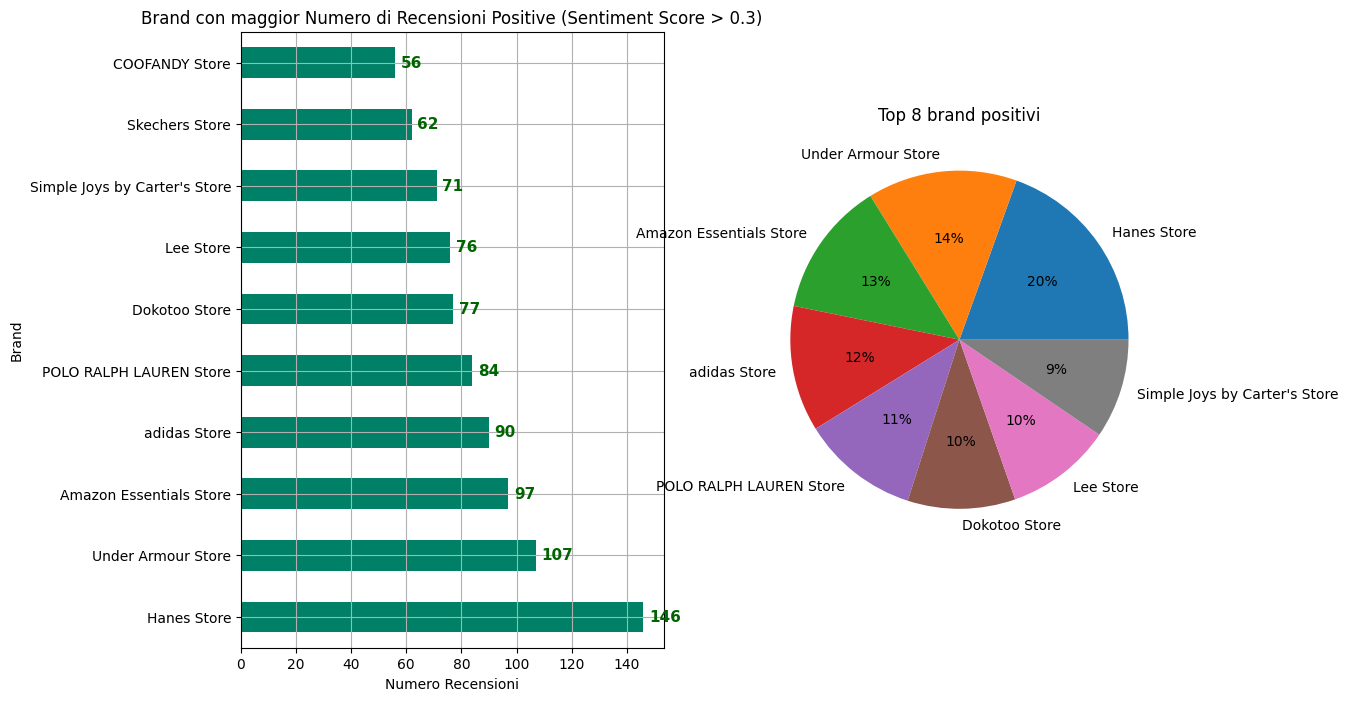

In [ ]:
brand_positive = (dfamazoncopy[dfamazoncopy['sentiment_score']>0.3]
    .groupby('brand_name')
    .size()
    .sort_values(ascending=False)
    .head(10)
)
#print(brand_position)

# subplot 1 row 2 columns
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
# graph 1
brand_positive.plot(
    ax=ax1,
    kind='barh',
    colormap='summer',
    grid=True
)
ax1.set_title('Brand con maggior Numero di Recensioni Positive (Sentiment Score > 0.3)')
ax1.set_ylabel('Brand')
ax1.set_xlabel('Numero Recensioni')
for i, v in enumerate(brand_positive.values):
    ax1.text(v + 2, 
             i, 
             f'{v:,}', 
             color='darkgreen', 
             va='center', 
             fontweight='bold', 
             fontsize=11)

# graph 2
brand_positive.head(8).plot(
    kind='pie',
    ax=ax2,
    autopct='%1.0f%%',
    
)
ax2.set_title('Top 8 brand positivi')

plt.show()

#### Analysis

Il grafico 1.1 sopra rappresenta dei principali brand presenti nel dataset che hanno ricevuto il maggior volume di recensioni con un punteggio di sentiment score positivo (definito come uno score superiore a 0.3). La visualizzazione illustra i marchi che hanno generato la maggiore soddisfazione tra i clienti. 
Sull asse Y sono elencati i brand, sull asse X il numero delle recensioni positive per ciascuno.

Il grafico 1.2 dimostra la distribuzione percentuale tra i top 8 brand con recensioni positive.

Il brand con più recensioni positivi è "Hanes Store".  Ha il numero più elevato delle recensioni positive pari a 146. Il brand "Under Armour Store" e "Amazon Essentials Store" completano il tris dei leader con il punteggio 107 e 97.

Il volume elevato delle recensioni positive è un forte indicatore di popolarità del prodotto e affitabilità del mercato. I marchi elencati hanno generato il maggior feedback entisiasta da parte dei clienti.

### Brand più recensiti e con sentimento negativo (per cui brand dove NON conviene investire)

Text(0.5, 1.0, 'Top 8 Brand Negativi')

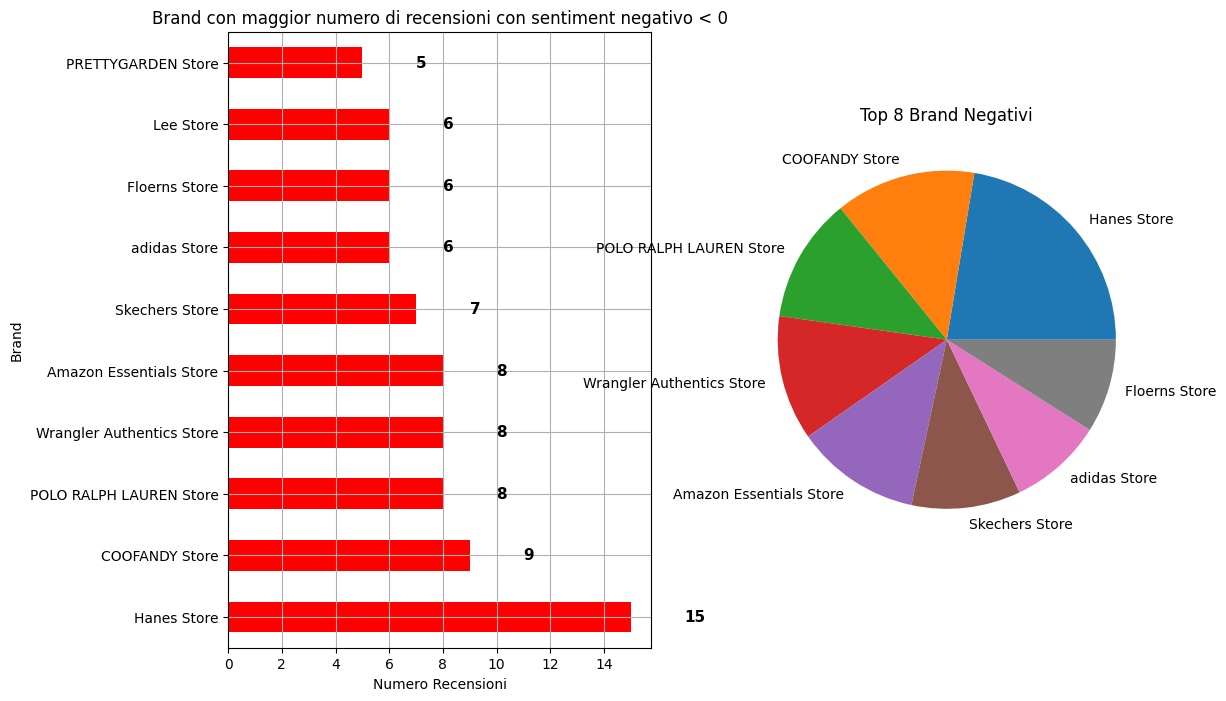

In [ ]:
brand_positive = (dfamazoncopy[dfamazoncopy['sentiment_score']<0]
                  .groupby('brand_name')
                  .size()
                  .sort_values(ascending=False)
                  .head(10)
)
# SUBPLOT 1 ROW x 2 COLUMNS
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
# graph 1
brand_positive.plot(
    ax=ax1,
    kind='barh',
    color='red',
    grid=True
)
ax1.set_title('Brand con maggior numero di recensioni con sentiment negativo < 0')
ax1.set_ylabel('Brand')
ax1.set_xlabel('Numero Recensioni')
for i, v in enumerate(brand_positive.values):
    ax1.text(v + 2, i, f'{v:,}',
            va='center',
            fontweight='bold', 
            fontsize=11,
            )

# graph 2
brand_positive.head(8).plot(
    kind='pie',
    ax=ax2
)
ax2.set_title('Top 8 Brand Negativi')

#### Analysis

Il grafico 2.1 sopra rappresenta sei principali brand presenti nel dataset che hanno ricevuto il maggior volume di recensioni con un punteggio di sentiment score negativo (definito come uno score inferiore a 0.0). La visualizzazione illustra i marchi che hanno generato la minore soddisfazione tra i clienti. 
Sull asse Y sono elencati i brand, sull asse X il numero delle recensioni negative per ciascuno.

Il grafico 2.2 dimostra la distribuzione percentuale tra i top 8 brand con le recensioni negative.

Il brand con più recensioni negative è "Hanes Store".  Ha il numero più elevato delle recensioni negative pari a 15. Il brand "COOFANDY Store" e "POLO RALF LAUREN Store" completano il tris dei "leader" con il punteggio 9 e 8.

Il volume elevato delle recensioni negative è un forte indicatore di insoddisfazione o problemi tra i clieti. I marchi elencati hanno generato il maggior feedback negativo da parte dei clienti.

### Analisi generale di sentiment score (sintesi)



Un brand ideale per un investimento dovrebbe avere un alto volume di vendite e una solida base di recensioni positive, con minimi feedback negativi, indicando un prodotto affidabile e un mercato stabile. 

Il brand "Hanes Stone" ha ricevuto più recensioni sia positive che negative. Questo può essere dovuto al suo leadership sul mercato e la quantità generale delle recensioni. 

Invece il brand "Under Armour Store" ha preso secondo posto nel TOP con il numero delle recensioni positive pari a 107 e nello stesso momento non è stato elencato tra i brand con il punteggio maggiore delle recensioni negative. 

Sulla base di questi insight, si raccomanda di investire nel brand "Under Armour Store". La sua capacità di generare un volume elevato di feedback positivi, combinata con un'assenza quasi totale di recensioni con score inferiore a 0, indica un marchio maturo, affidabile e con un'eccellente percezione della qualità.

### Categorie prodotti più venduti e totale degli incassi in base alla categoria

#### Analysis

La categoria più venduta è Clothing, Shoes & Jewelry (Vestiti, Scarpe, Gioielleria), sono 212857 unità totale vendute e 6276 recensioni ricevute. Questo indica una domanda di mercato molto elevata. 

I dati evidenziano un dominio schiacciante della categoria 'Clothing Man'.

Pertanto, la raccomandazione di investimento si concentra sulla categoria 'Clothing Man' nel suo insieme, mirando ai brand specifici all'interno di essa che mantengono un sentiment positivo e volumi di vendita elevati

,category1,n_review,sum_sales
0,"Clothing, Shoes & Jewelry",6276,212857.17
1,Electronics,2,67.96
2,Sports & Outdoors,10,384.00


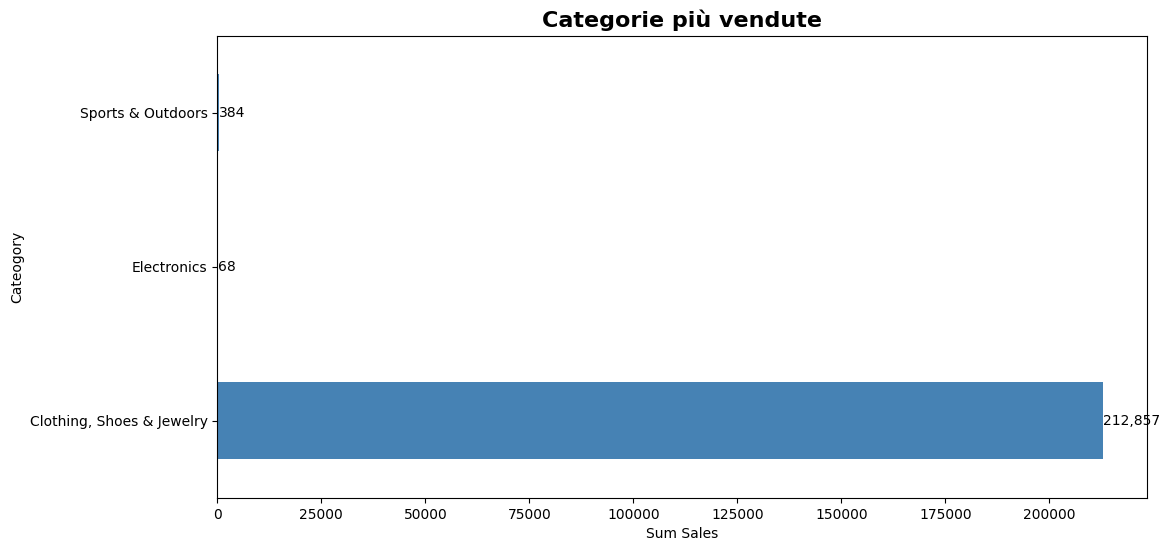

In [ ]:
# calculate reviews and sales per category1

cat1_sales=(dfamazoncopy[dfamazoncopy['category1'].notna() & (dfamazoncopy['category1'].str.strip()!='')]
    .groupby('category1')['price_value']
    .agg(['count','sum'])
    .reset_index()
    .rename(columns={
        'count':'n_review',
        'sum':'sum_sales'
    })
)
display(cat1_sales)

# plot 1
ax1=(cat1_sales.set_index('category1')['sum_sales']
    .plot(
        kind='barh',
        color='steelblue',
        figsize=(12,6)
    ))
for i,v in enumerate(cat1_sales['sum_sales']):
    plt.text (v,i, f'{v:,.0f}', va='center', ha='left',fontsize='10')
    ax1.set_title('Categorie più vendute',fontsize=16,fontweight='bold')
    ax1.set_xlabel('Sum Sales')
    ax1.set_ylabel('Cateogory')
plt.show()



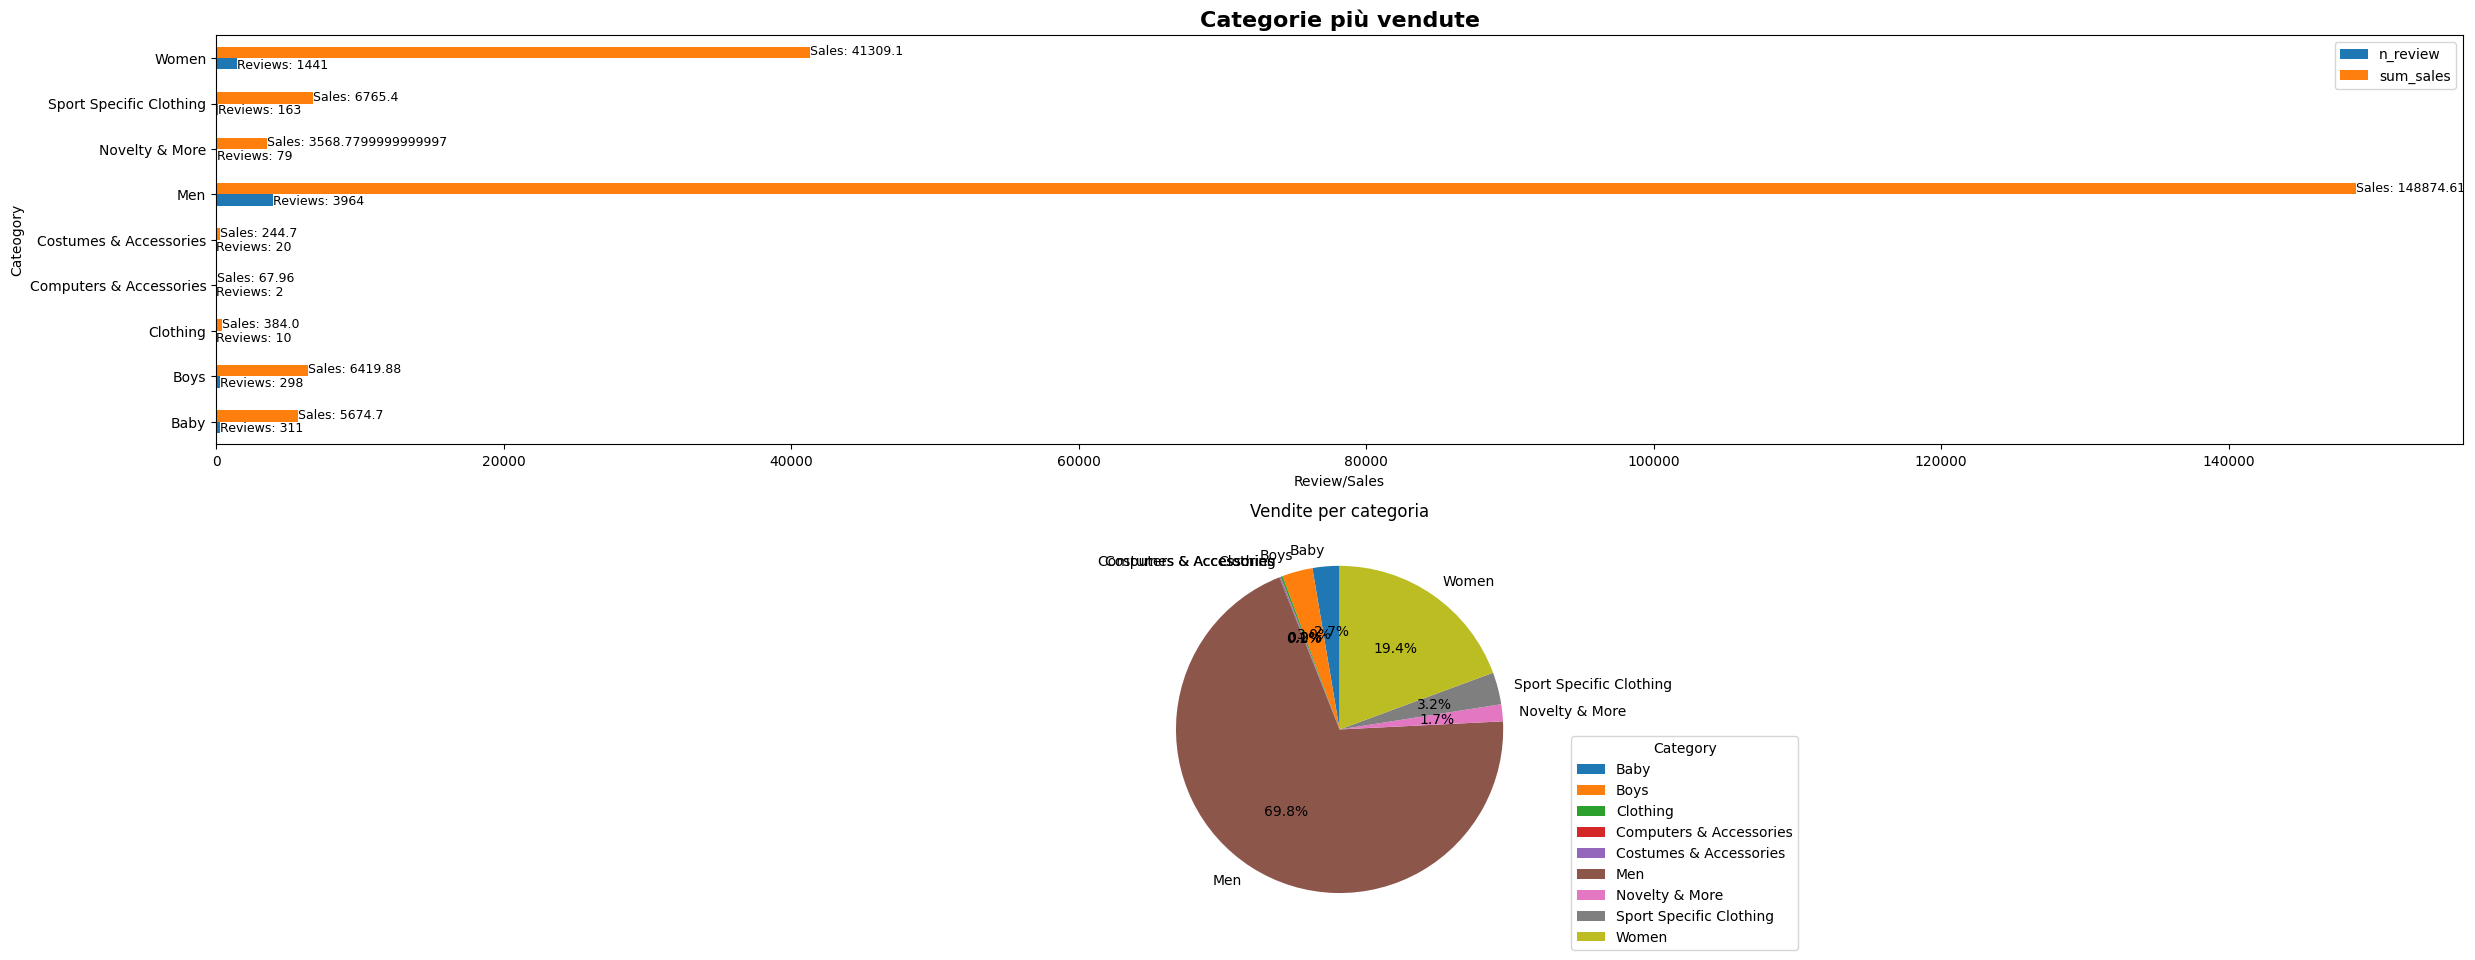

In [ ]:
# calculate reviews and sales per category2
cat2_sales=(dfamazoncopy[dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='')]
            .groupby('category2')['price_value']
            .agg(['count','sum'])
            .reset_index()
            .rename(columns={
                'count':'n_review',
                'sum':'sum_sales'
            })
            )
plot_cate=cat2_sales.set_index('category2')[['n_review','sum_sales']]
fig,(ax2,ax3)=plt.subplots(2,1,figsize=(25,8))
# subplot 1
ax2=plot_cate.plot(
    ax=ax2,
    kind='barh',
    figsize=(25,10)
)
for i, (val_review, val_sales) in enumerate(zip(plot_cate['n_review'],plot_cate['sum_sales'])):
    ax2.text(val_review, i-0.15, f'Reviews: {val_review}', va='center', ha='left',fontsize=9)
    ax2.text(val_sales, i+0.15, f'Sales: {val_sales}', va='center', ha='left',fontsize=9)
ax2.set_title('Categorie più vendute',fontsize=16,fontweight='bold')
ax2.set_xlabel('Review/Sales')
ax2.set_ylabel('Cateogory')
# subplot 2
plot_cate['sum_sales'].plot(
    ax=ax3,
    kind='pie',
    labels=plot_cate.index,
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''
)
# add legend
ax3.legend(
    plot_cate.index,
    title='Category',
    loc='best',
    bbox_to_anchor=(1.05,0.5) # for moving outside
)
ax3.set_title('Vendite per categoria')
plt.tight_layout() # for not overlapping plots
plt.show()

### Categorie prodotti più recensiti e con sentimento positivo (per cui categorie su cui investire)

In [35]:
cat1_positive = (dfamazoncopy[dfamazoncopy['category1'].notna() 
                              & (dfamazoncopy['category1'].str.strip()!='') 
                              & (dfamazoncopy['sentiment_score']>0.3)]
                  .groupby('category1')
                  .size()
                  .sort_values(ascending=False)
                  .head(10)
)
print(cat1_positive)

category1
Clothing, Shoes & Jewelry    3117
Sports & Outdoors               3
Electronics                     2
dtype: int64


In [36]:
cat1_negative = (dfamazoncopy[dfamazoncopy['category1'].notna() 
                              & (dfamazoncopy['category1'].str.strip()!='') 
                              & (dfamazoncopy['sentiment_score']<0.0)]
                  .groupby('category1')
                  .size()
                  .sort_values(ascending=False)
                  .head(10)
)
print(cat1_negative)

category1
Clothing, Shoes & Jewelry    276
dtype: int64


In [37]:
cat2_positive = (dfamazoncopy[dfamazoncopy['category2'].notna() 
                              & (dfamazoncopy['category2'].str.strip()!='') 
                              & (dfamazoncopy['sentiment_score']>0.3)]
                  .groupby('category2')
                  .size()
                  .sort_values(ascending=False)
                  .head(10)
)
print(cat2_positive)

category2
Men                        1935
Women                       693
Baby                        184
Boys                        174
Sport Specific Clothing      75
Novelty & More               47
Costumes & Accessories        9
Clothing                      3
Computers & Accessories       2
dtype: int64


In [38]:
cat2_negative = (dfamazoncopy[dfamazoncopy['category2'].notna() 
                              & (dfamazoncopy['category2'].str.strip()!='') 
                              & (dfamazoncopy['sentiment_score']<0.0)]
                  .groupby('category2')
                  .size()
                  .sort_values(ascending=False)
                  .head(10)
)
print(cat2_negative)

category2
Men                        177
Women                       59
Baby                        13
Boys                        11
Novelty & More               7
Sport Specific Clothing      7
Costumes & Accessories       2
dtype: int64


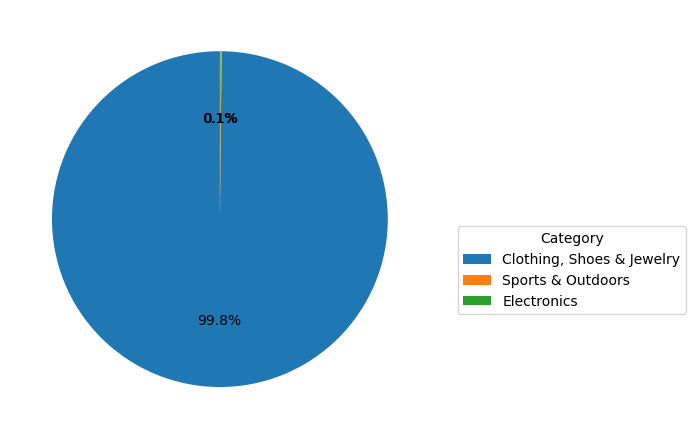

In [ ]:
# copy dataframe for needed columns
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']>0.3)
cat12_pose = dfamazoncopy.loc[mask,['category1','category2']].copy()
# count reviews
cat1_positive=(
    cat12_pose
    .groupby('category1')
    .size()
    .sort_values(ascending=False)
)
cat1_positive=cat1_positive.rename('n_positive').reset_index()
cat1_cat2_grouped = (cat12_pose
                    .groupby('category1')['category2']
                    .apply(lambda x:', '.join(sorted(set(c for c in x.astype(str) if c.strip()!=''
                    ))))
                    .reset_index(name='category2_grouped')
)
# merge tables
tab_final=cat1_cat2_grouped.merge(cat1_positive,on='category1',how='right')
tab_final

# plot
ax4=tab_final['n_positive'].plot(
    kind='pie',
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''
)
# legend
ax4.legend(
    tab_final['category1'],
    title='Category',
    loc='best',
    bbox_to_anchor=(1.05,0.5) # for moving outside
)
ax3.set_title('Recensioni per categoria')
plt.tight_layout() # for not overlapping plots
# plt.savefig('grafico.png', dpi=300, bbox_inches='tight')
plt.show()

                 category2  n_positive                  category1
0                      Men        1935  Clothing, Shoes & Jewelry
1                    Women         693  Clothing, Shoes & Jewelry
2                     Baby         184  Clothing, Shoes & Jewelry
3                     Boys         174  Clothing, Shoes & Jewelry
4  Sport Specific Clothing          75  Clothing, Shoes & Jewelry
5           Novelty & More          47  Clothing, Shoes & Jewelry
6   Costumes & Accessories           9  Clothing, Shoes & Jewelry
7                 Clothing           3          Sports & Outdoors
8  Computers & Accessories           2                Electronics


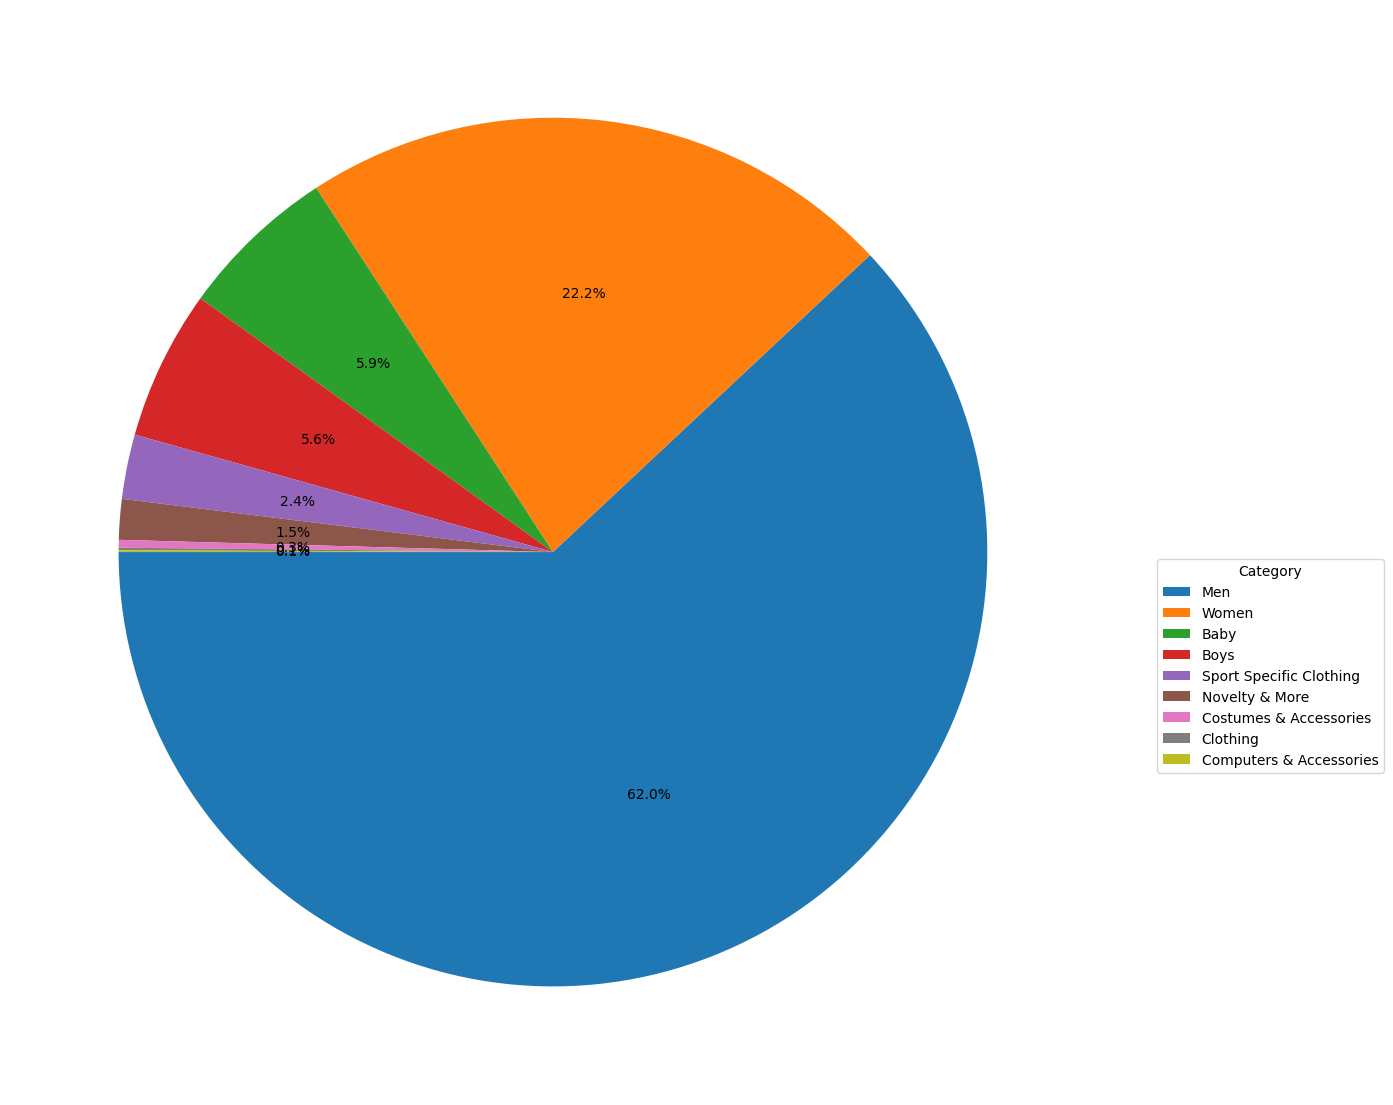

In [ ]:
# copy dataframe for needed columns
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']>0.3)
cat12_pose = dfamazoncopy.loc[mask,['category1','category2']].copy()
# count reviews
cat2_positive=(
    cat12_pose
    .groupby('category2')
    .size()
    .sort_values(ascending=False)
)
cat2_positive=cat2_positive.rename('n_positive').reset_index()

cat1_sample_per_cat2 = (
    cat12_pose
    .groupby('category2')['category1']
    .first() 
    .reset_index(name='category1')
)

# merge tables
tab_final = cat2_positive.merge(cat1_sample_per_cat2, on='category2', how='left')
print(tab_final)
 

# plot pie

ax4=tab_final['n_positive'].plot(
    figsize=(14,14),
    kind='pie',
    labels=None,
    autopct='%1.1f%%',
    startangle=180,
    ylabel=''
)
# legend
ax4.legend(
    tab_final['category2'],
    title='Category',
    loc='best',
    bbox_to_anchor=(1.05,0.5)  
)
ax3.set_title('Recensioni per categoria')
plt.tight_layout()  
#plt.savefig('grafico.png', dpi=300, bbox_inches='tight')
plt.show()

### Categorie prodotti più recensiti e con sentimento negativo (per cui categorie su cui NON investire)

                 category2  n_negative                  category1
0                      Men         177  Clothing, Shoes & Jewelry
1                    Women          59  Clothing, Shoes & Jewelry
2                     Baby          13  Clothing, Shoes & Jewelry
3                     Boys          11  Clothing, Shoes & Jewelry
4           Novelty & More           7  Clothing, Shoes & Jewelry
5  Sport Specific Clothing           7  Clothing, Shoes & Jewelry
6   Costumes & Accessories           2  Clothing, Shoes & Jewelry


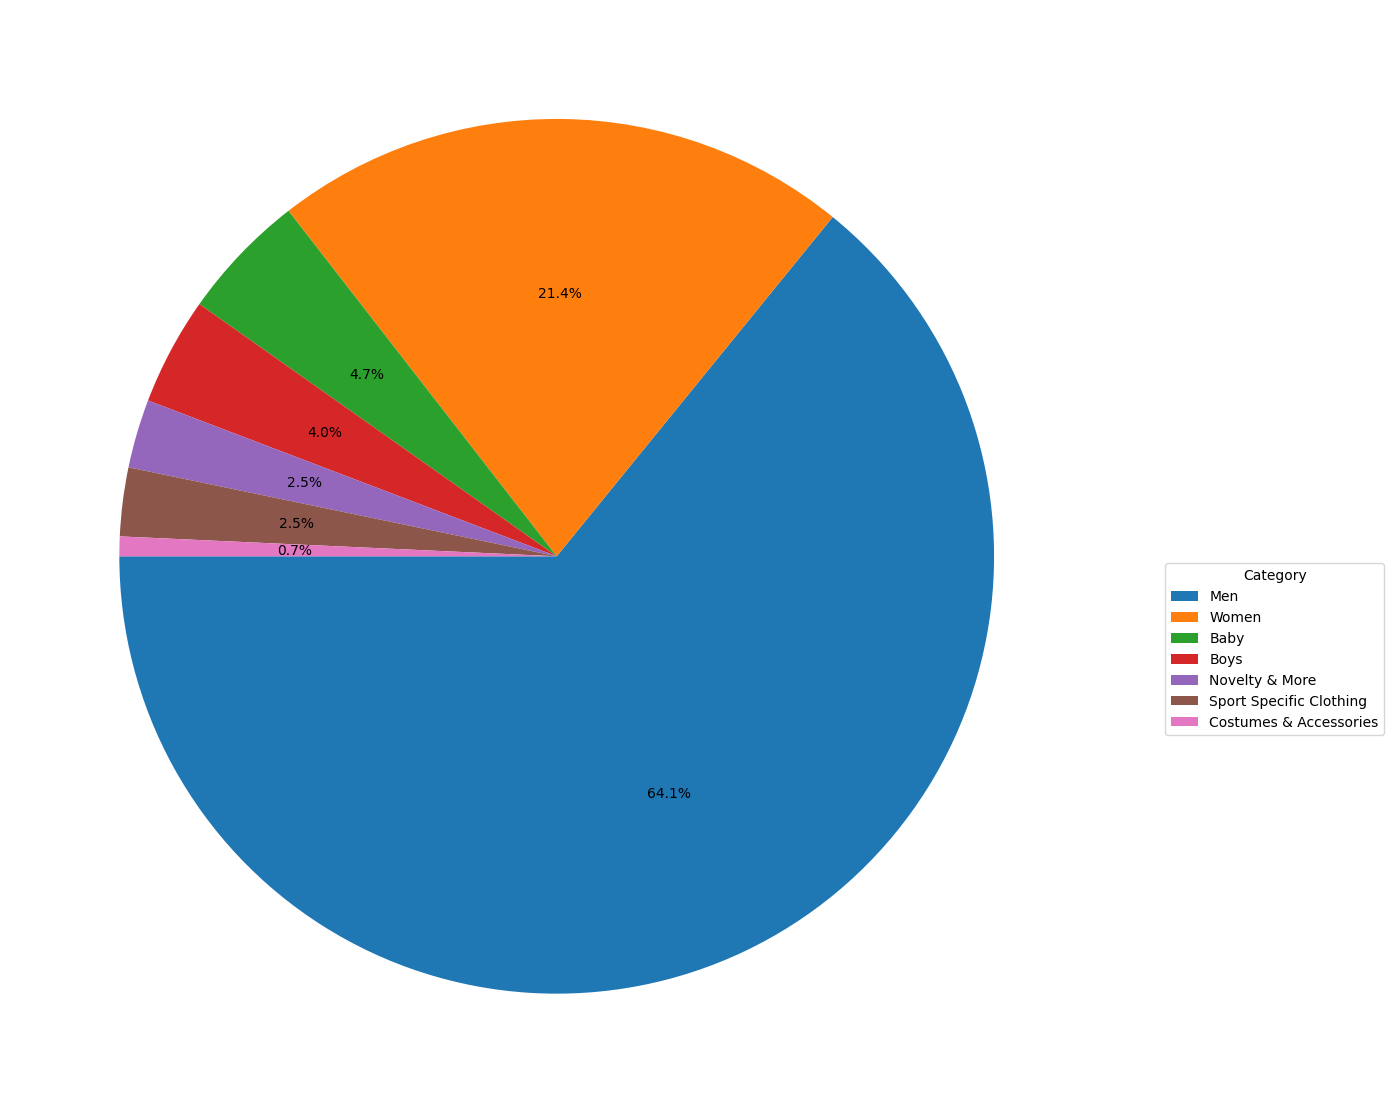

In [52]:
# copy dataframe for needed columns
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']<0.0)
cat12_neg = dfamazoncopy.loc[mask,['category1','category2']].copy()
# count reviews
cat2_negative=(
    cat12_neg
    .groupby('category2')
    .size()
    .sort_values(ascending=False)
)
cat2_negative=cat2_negative.rename('n_negative').reset_index()

cat1_cat2_grouped = (
    cat12_neg
    .groupby('category2')['category1']
    .first() 
    .reset_index(name='category1')
)

# merge tables
tab_final = cat2_negative.merge(cat1_cat2_grouped, on='category2', how='left')
print(tab_final)
 

# plot pie

ax4=tab_final['n_negative'].plot(
    figsize=(14,14),
    kind='pie',
    labels=None,
    autopct='%1.1f%%',
    startangle=180,
    ylabel=''
)
# legend
ax4.legend(
    tab_final['category2'],
    title='Category',
    loc='best',
    bbox_to_anchor=(1.05,0.5)  
)
ax3.set_title('Recensioni per categoria')
plt.tight_layout()  
#plt.savefig('grafico.png', dpi=300, bbox_inches='tight')
plt.show()

### Tabella per le recensioni per categoria totale

In [ ]:
# copy dataframe for needed columns
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']<0.0)
cat12_neg = dfamazoncopy.loc[mask,['category2']].copy()
# count reviews
cat2_negative=(
    cat12_neg
    .groupby('category2')
    .size()
    #.sort_values(ascending=False)
)
cat2_negative=cat2_negative.rename('n_negative').reset_index()

# copy DF for needed columns
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']>0.3)
cat12_pose = dfamazoncopy.loc[mask,['category2']].copy()
#contare recensioni
cat2_positive=(
    cat12_pose
    .groupby('category2')
    .size()
    .sort_values(ascending=False)
)
cat2_positive=cat2_positive.rename('n_positive').reset_index()

#COPIO DATAFRAME PER COLONNE CHE MI SERVONO
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']<=0.3) & (dfamazoncopy['sentiment_score']>=0.0)
cat12_neutr = dfamazoncopy.loc[mask,['category2']].copy()
#contare recensioni
cat2_neutral=(
    cat12_neutr
    .groupby('category2')
    .size()
    #.sort_values(ascending=False)
)
cat2_neutral=cat2_neutral.rename('n_neutre').reset_index()

# merge tra i tre DataFrame
tab_final = cat2_positive.merge(cat2_neutral, on='category2', how='left').merge(cat2_negative, on='category2', how='left')


# Riempio eventuali NaN con 0 per evitare errori nel calcolo
tab_final[['n_positive', 'n_neutre', 'n_negative']] = tab_final[['n_positive', 'n_neutre', 'n_negative']].fillna(0)

# Creo la nuova colonna calcolando la percentuale
tab_final['%_positive'] = (
    tab_final['n_positive'] / (tab_final['n_positive'] + tab_final['n_neutre'] + tab_final['n_negative']) * 100
).round(2)

tab_final['%_neutre'] = (
    tab_final['n_neutre'] / (tab_final['n_positive'] + tab_final['n_neutre'] + tab_final['n_negative']) * 100
).round(2)

tab_final['%_negative'] = (
    tab_final['n_negative'] / (tab_final['n_positive'] + tab_final['n_neutre'] + tab_final['n_negative']) * 100
).round(2)

print(tab_final)


                 category2  n_positive  n_neutre  n_negative  %_positive  \
0                      Men        1935    1828.0       177.0       49.11   
1                    Women         693     687.0        59.0       48.16   
2                     Baby         184     114.0        13.0       59.16   
3                     Boys         174     112.0        11.0       58.59   
4  Sport Specific Clothing          75      81.0         7.0       46.01   
5           Novelty & More          47      25.0         7.0       59.49   
6   Costumes & Accessories           9       9.0         2.0       45.00   
7                 Clothing           3       7.0         0.0       30.00   
8  Computers & Accessories           2       0.0         0.0      100.00   

   %_neutre  %_negative  
0     46.40        4.49  
1     47.74        4.10  
2     36.66        4.18  
3     37.71        3.70  
4     49.69        4.29  
5     31.65        8.86  
6     45.00       10.00  
7     70.00        0.00  
8    

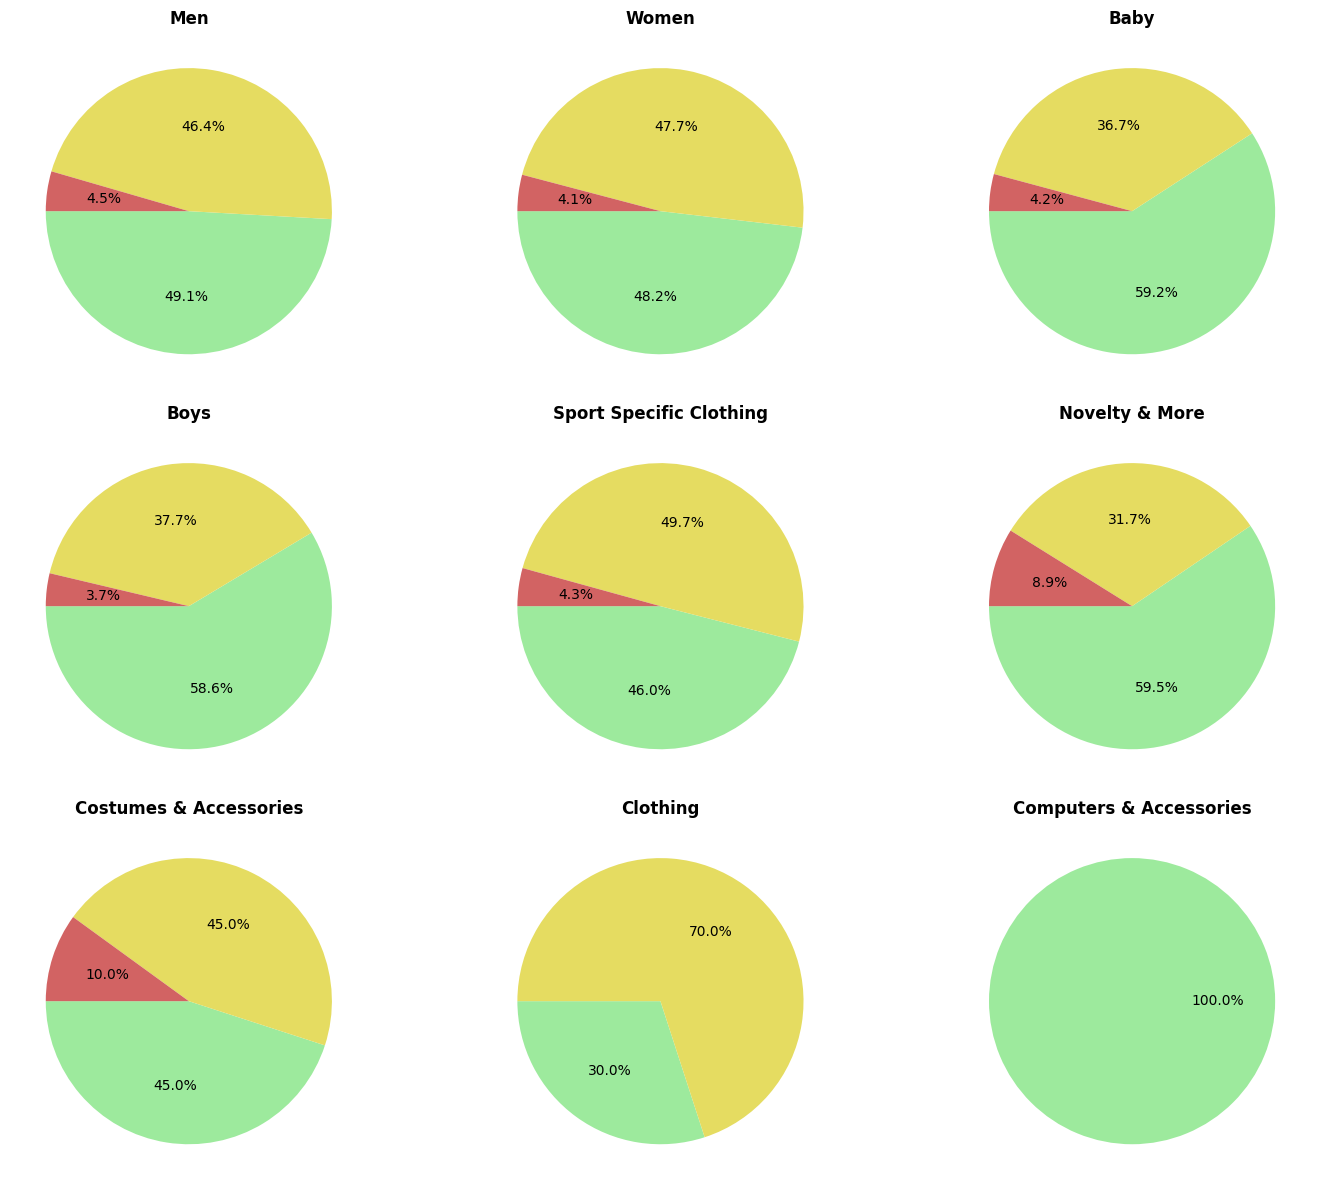

In [47]:

# Impostazioni grafiche
colors = ["#9dea9d", "#e5dc61", "#d26363"]  # Verde, Giallo, Rosso
n_categorie = len(tab_final)
n_cols = 3  # Numero di colonne della griglia
n_rows = math.ceil(n_categorie / n_cols)

# Creazione della figura e dei subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Appiattiamo l'array degli assi per iterare facilmente

for i, (index, row) in enumerate(tab_final.iterrows()):
    # Dati per il grafico corrente
    sizes = [row['%_positive'], row['%_neutre'], row['%_negative']]
    labels = None  # Non mostriamo le etichette direttamente sul grafico
    
    # Filtro per evitare errori se mancano dati in una classe
    filtered_data = [(s, c) for s, c in zip(sizes, colors) if s > 0]
    
    if filtered_data:
        curr_sizes, curr_colors = zip(*filtered_data)
        axes[i].pie(
            curr_sizes, 
            labels=None, 
            autopct='%1.1f%%', 
            colors=curr_colors, 
            startangle=180,
            textprops={'fontsize': 10}
        )
        axes[i].set_title(row['category2'], fontweight='bold')
    else:
        axes[i].axis('off') # Nasconde il subplot se non ci sono dati


plt.tight_layout()
plt.show()

#### Analysis

L'analisi si basa su un equilibrio tra volume di recensioni (che indica un mercato esistente) e percentuale di sodddisfazione (che indica la qualità del prodotto/servizio). 

Le categorie <i><u>Men</u></i> e <i><u>Women</u></i> rappresentano il mercato più ampio. La percentuale di sentiment positivo è attorno ai 50%, il resto è principalmente neutro. Il volume di recensioni indica una solida base clienti. La percentuale di recensioni negative è molto bassa (sotto i 5%), i prodotti generalmente soddisfano le aspettative minime.

Le categorie <i><u>Baby</u></i> e <i><u>Boys</u></i> sono con il miglior rapporto tra soddisfazione e volume. Superano il 60% di recensioni positive e la loro percentuale di recenzioni negative è inferiore al 4.6%. La soddisfazione dei clienti è più alta rispetto alle categorie <i><u>Men</u></i> e <i><u>Women</u></i>, quindi c'è opportunità per fidelizzare la clientela e scalare l'attività.

La categoria <i><u>Novelty & More</u></i> ha la più alta percentuale positiva in assoluto (67%). Però si deve considerare il volume basso delle recensioni totali (70). Può essere ottimo per articoli di nicchia e tendenze. 

La categoria <i><u>Costumes & Accessories</u></i> ha il più alto tasso di recensioni negative (13.33%) dell'intero set di dati. Il volume totale di recensioni è molto basso (15). La volatilità suggerisce che i prodotti sono o molto amati o molto deludenti. C'è bisogno di un'attenta gestione della qualità.

La categoria <i><u>Sport Specific Clothing</u></i> è la più "neutra". Quasi metà delle recensioni sono indifferenti (48.43%), il negativo è minimo (4.40%). Investire qui richiederà un maggiore sforzo di marketing per trasformare l'interesse "neutro" in acquisti entusiasti e fidelizzati.

La categoria <i><u>Clothing</u></i> ha solo 10 recensioni totali tra quli il 30% è positivo, il resto neutro. Il volume è troppo basso per trarre conclusioni affidabili. 
Lo stesso per la categoria <i><u>Computers & Accessories</u></i> che ha solamente 2 recensioni in totale.



- <b>Top Investimento (Qualità)</b>: <i><u>Baby</u></i> e <i><u>Boys</u></i>. Hanno il miglior equilibrio tra volume e soddisfazione, con oltre il 60% di recensioni positive e pochissime lamentele (sotto il 5%).
- <b>Top Investimento (Volume)</b>: <i><u>Men</u></i> e <i><u>Women</u></i>. Sono i mercati più grandi per numero di vendite. Anche se la positività è più bassa (circa 50%), il rischio è minimo perché le recensioni negative sono quasi inesistenti.
- <b>Nicchia potenziale</b>: <i><u>Novelty & More</u></i>. Alta soddisfazione (67%), ottima per piccoli investimenti mirati.
- <b>Da evitare</b>: <i><u>Clothing</u></i> e <i><u>Computers & Accessories</u></i>. Volumi troppo bassi o sentiment troppo neutro per giustificare un rischio al momento.

<b>In breve</b>: si deve puntare su <i><u>Baby</u></i>/<i><u>Boys</u></i> per la fedeltà del cliente e su <i><u>Men</u></i>/<i><u>Women</u></i> per la massa critica.


#### plot barth

NameError: name 'tab_final2' is not defined

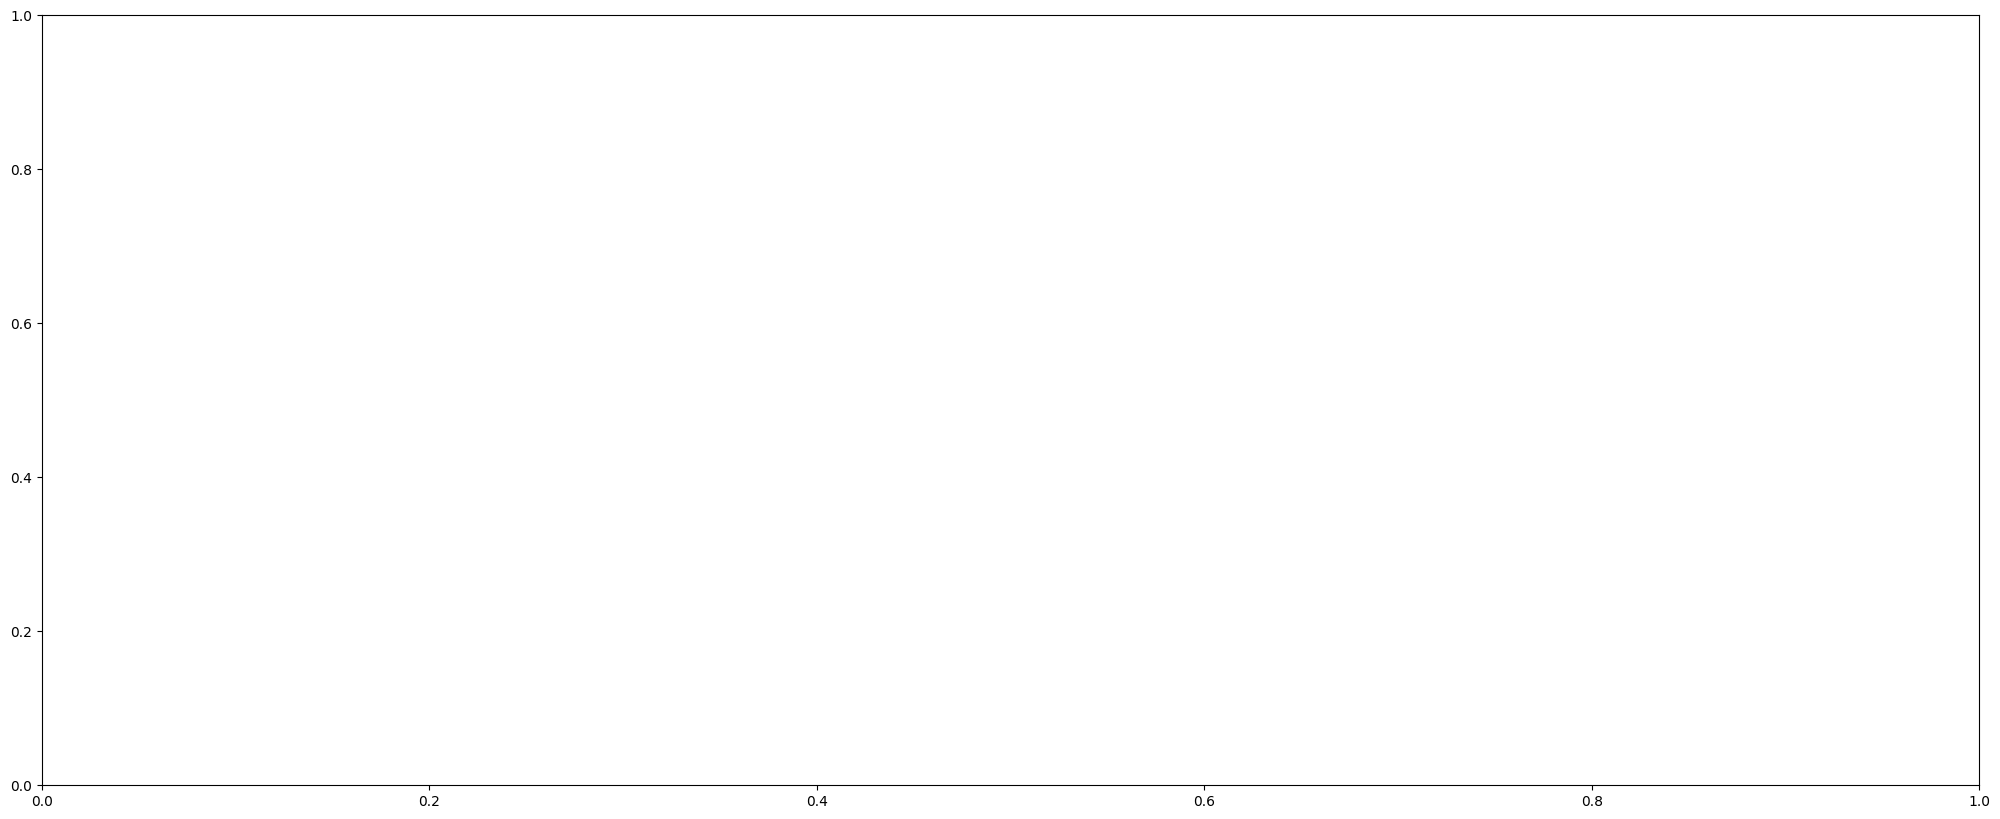

In [44]:
# PLOT BARH  DA CORREGGERE

ig, ax2 = plt.subplots(figsize=(25, 10))

# solo le 3 colonne di conteggio nel barh
tab_final2[['n_neutre','n_nega','n_positive']].plot(
    kind='barh',
    ax=ax2,
    color=['orange', 'red', 'green'],
    alpha=0.8
)

# etichette con valore + percentuale
for i, (idx, row) in enumerate(tab_final2.iterrows()):
    vn, vneg, vpos = row['n_neutre'], row['n_nega'], row['n_positive']
    pn, pneg, ppos = row['% neutre'], row['% negative'], row['% positive']

    ax2.text(vn  + 5, i - 0.25, f'Neu: {int(vn)} ({pn}%)',   va='center', ha='left', fontsize=9)
    ax2.text(vneg+ 5, i,        f'Neg: {int(vneg)} ({pneg}%)', va='center', ha='left', fontsize=9, color='red')
    ax2.text(vpos+ 5, i + 0.25, f'Pos: {int(vpos)} ({ppos}%)', va='center', ha='left', fontsize=9, color='green')

ax2.set_title('Categorie più recensite per sentiment', fontsize=16, fontweight='bold')
ax2.set_xlabel('Numero recensioni')
ax2.set_ylabel('Category2')
ax2.legend(title='Sentiment', loc='upper right')

plt.tight_layout()
plt.savefig('grafico_categorie_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

### Prodotti più recensiti con sentimento positivo

In [50]:
#RECENSIONI POSITIVE
mask=dfamazoncopy['title'].notna() & (dfamazoncopy['title'].str.strip()!='') & (dfamazoncopy['sentiment_score']>0.3)
product_positive = dfamazoncopy.loc[mask,['title','brand_name','sentiment_score']].copy()
#contare recensioni
product_reviews_positive=(
    product_positive
    .groupby('title')['sentiment_score']
    .count()
    .sort_values(ascending=False)
    .rename('n_reviews_positive')
    .reset_index()
)

#RECENSIONI NEUTRE
mask=dfamazoncopy['title'].notna() & (dfamazoncopy['title'].str.strip()!='') & (dfamazoncopy['sentiment_score']>=0.0) & (dfamazoncopy['sentiment_score']<=0.3)
product_neutre = dfamazoncopy.loc[mask,['title','brand_name','sentiment_score']].copy()
#contare recensioni
product_reviews_neutre=(
    product_neutre
    .groupby('title')['sentiment_score']
    .count()
    .sort_values(ascending=False)
    .rename('n_reviews_neutre')
    .reset_index()
)

#RECENSIONI NEGATIVE
mask=dfamazoncopy['title'].notna() & (dfamazoncopy['title'].str.strip()!='') & (dfamazoncopy['sentiment_score']<0.0)
product_negative = dfamazoncopy.loc[mask,['title','brand_name','sentiment_score']].copy()
#contare recensioni
product_reviews_negative=(
    product_negative
    .groupby('title')['sentiment_score']
    .count()
    .sort_values(ascending=False)
    .rename('n_reviews_negative')
    .reset_index()
)

#MERGE
tab_final_p_r=product_reviews_positive.merge(product_reviews_neutre,on='title',how='right')
tab_final_p_r=tab_final_p_r.merge(product_reviews_negative,on='title',how='right')

#RIEMPIO tutti i NAN con 0
tab_final_p_r=tab_final_p_r.fillna(0)

#ORDINO TABELLA
tab_final_p_r['n_reviews_tot']=(
    tab_final_p_r['n_reviews_positive']+
    tab_final_p_r ['n_reviews_negative']+
    tab_final_p_r['n_reviews_neutre']
)

tab_final_p_r=tab_final_p_r.sort_values(
    by='n_reviews_tot',
    ascending=False
).reset_index(drop=True)

tab_final_p_r.head(20)

,title,n_reviews_positive,n_reviews_neutre,n_reviews_negative,n_reviews_tot
0,"Hanes Men's EcoSmart Fleece, Pullover Crewneck...",7.0,12.0,1,20.0
1,Lee Men's Regular Fit Straight Leg Jean,8.0,11.0,1,20.0
2,Nautica Men's Short Sleeve Solid Crew Neck T-S...,5.0,8.0,1,14.0
3,Dockers Men's Perfect Classic Fit 8 Shorts,9.0,3.0,1,13.0
4,Mens Chinos Slim Fit Pants Flat Front Stretch ...,4.0,6.0,2,12.0
5,JUNBAOSS Men's Slim Fit Stretch Jeans Ripped S...,7.0,3.0,2,12.0
6,"Hanes Men's Beefy-T T-Shirt, Heavyweight Cotto...",4.0,7.0,1,12.0
7,DeYashopin Women's Flats Shoes Leisure Shoes S...,8.0,2.0,1,11.0
8,HEAWISH Women's Floral Ballet Flats for Women ...,4.0,6.0,1,11.0
9,POLO RALPH LAUREN Men's Slim Fit Stretch Crew Tee,8.0,2.0,1,11.0
